# **INTRODUCTION**
---

**Problem Statement**

Tarif taksi Uber dan Lyft tidak stabil layaknya transportasi publik. Mereka sangat dipengaruhi oleh permintaan dan penawaran jasa layanan transportasi pada waktu tertentu. Kita akan mengetahui hal apa saja yang mendorong permintaan jasa layanan transportasi dan bagaimana tarifnya dapat bervariasi. Perbedaan waktu dapat menyebabkan lonjakan jumlah permintaan.

**Objectives** 
- Untuk memahami faktor-faktor yang mempengaruhi tarif taksi
- Untuk memprediksi tarif jasa layanan transportasi berdasarkan faktor-faktor tersebut

**Defining the Metrics for Success**

Proyek kami akan dianggap berhasil ketika kami memahami faktor-faktor yang memengaruhi harga taksi dan membuat model prediktif serta kinerjanya dievaluasi

# **IMPORT PUSTAKA**
---

In [3]:

import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# for creating labelEncoder
from sklearn import preprocessing

# for splitting data
from sklearn.model_selection import train_test_split

# for building model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

# for evaluating model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# for choosing best model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

# for deployment
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import math
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# **DATA LOADING**
---

In [4]:
# real data
df_raw = pd.read_csv('rideshare_kaggle.csv', encoding='latin-1')

# data for data cleaning
df = df_raw
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

In [5]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [6]:
df.shape

(693071, 57)

In [7]:
df.info

<bound method DataFrame.info of                                           id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

       

# **DATA CLEANING**
---

Kita cek apakah kita memiliki data duplikat

In [8]:
df.duplicated().sum()

0

In [9]:
# check total missing values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [10]:
df.isnull().sum().sum()

55095

Kolom price memiliki lebih dari 50000 missing values. Berikut ini adalah visualisasi dari missing values tersebut

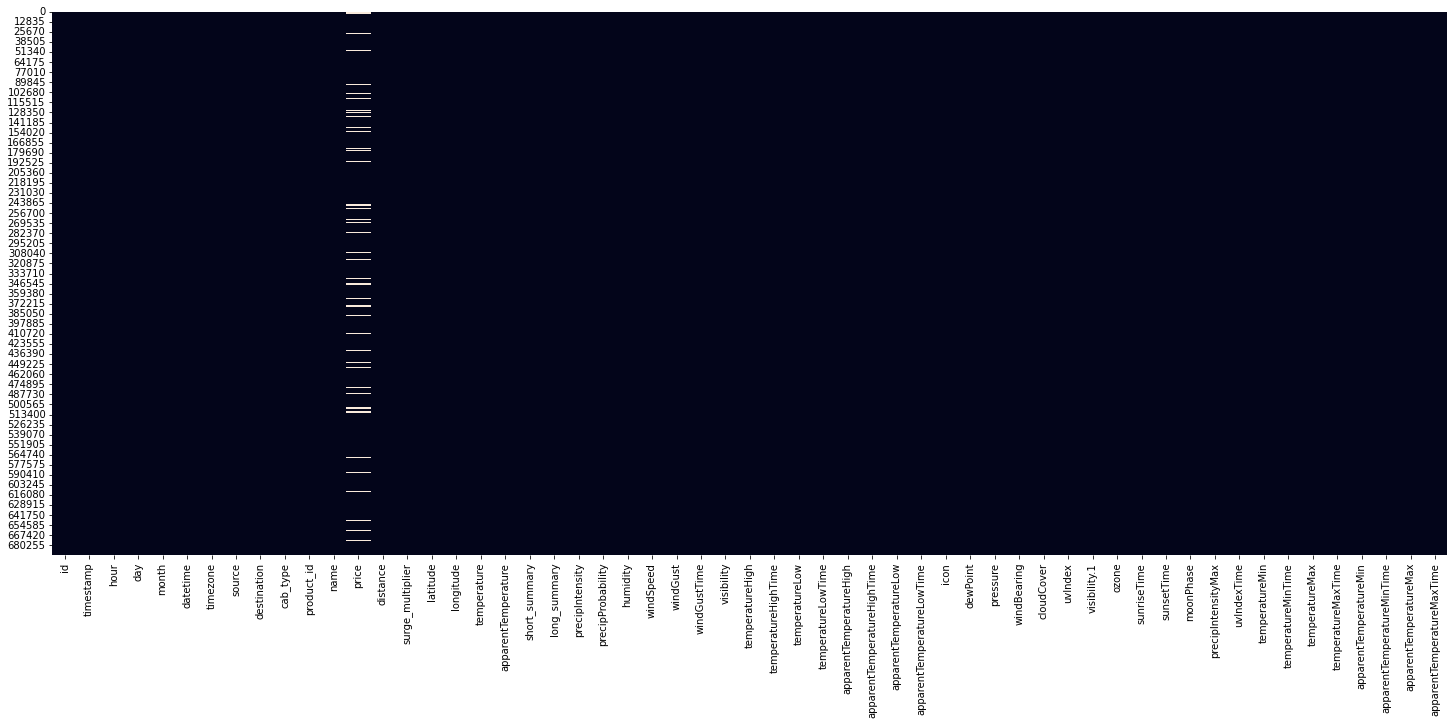

In [11]:
plt.figure(figsize=(25, 10))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

Setelah itu kita akan menghapus missing values

In [12]:
# drop missing values
df = df[df['price'].isnull()==False]

In [13]:
# check total missing values after droping
df.isnull().sum().sum()

0

Kita cek kembali apakah missing values sudah hilang

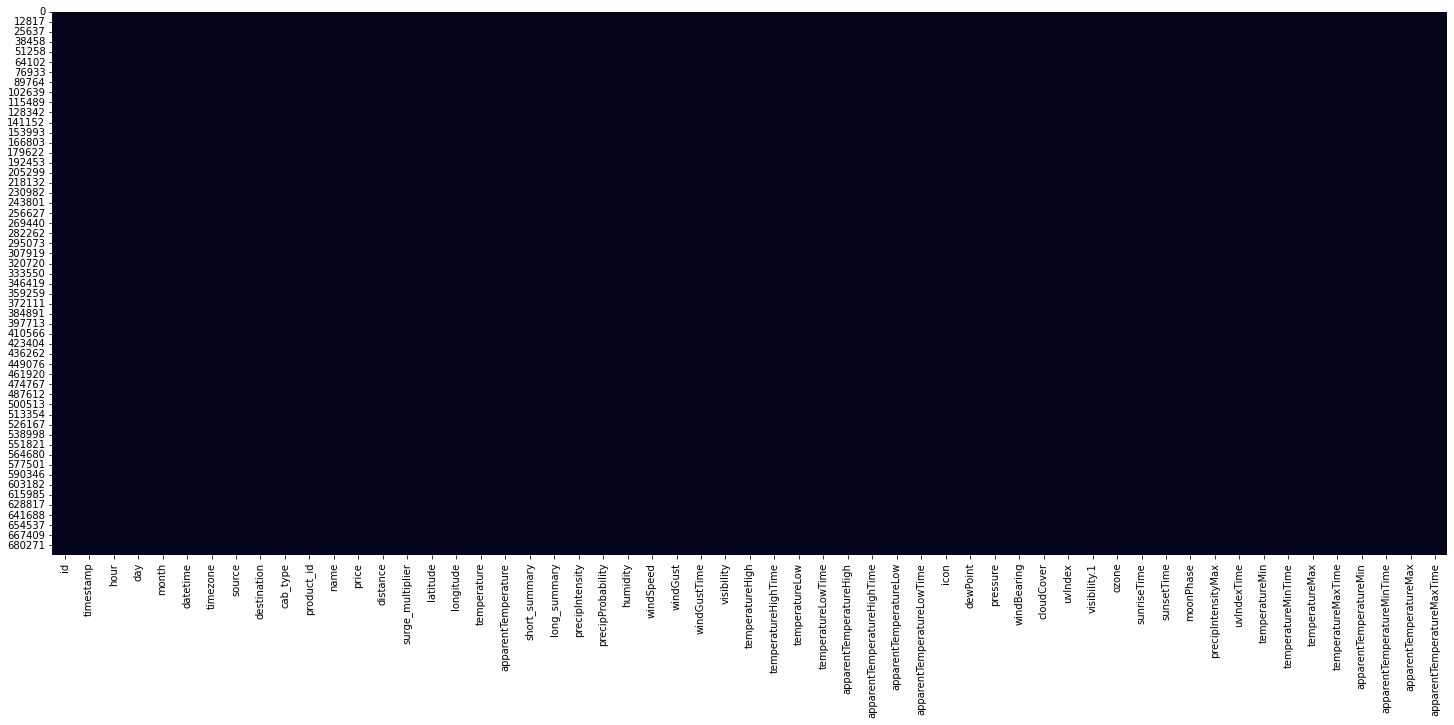

In [14]:
plt.figure(figsize=(25, 10))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

In [15]:
# check column visibility
df['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [16]:
# check column visibility.1
df['visibility.1'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility.1, dtype: float64

In [17]:
# drop column visibility.1
df = df.drop(['visibility.1'],axis=1)

# **EDA**
---

### Analisis Price

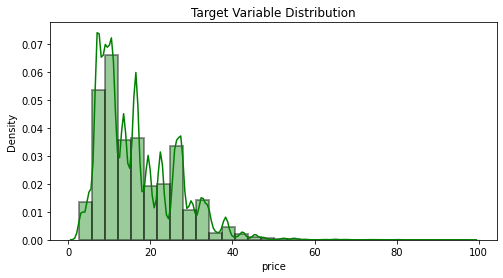

In [18]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df['price'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

### Analisis Waktu

Sebelum kita mulai menganalisis waktu, kita akan membuat fungsi grouping berdasarkan kolom yang ada di dataframe. Lalu kita visualisasikan fungsi tersebut dengan banyaknya data tersebut muncul dalam data

In [19]:
def plot_bar(groupby_column):
    df1 = df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame = df1,
                  x = groupby_column,
                  y = "counts",
                  color = groupby_column,
                  barmode = "group")
    print(df1)
    fig1.show()

#### Analisis Bulan

Kita akan menganalisis bulan yang ada dalam data

In [20]:
plot_bar('month')

   month  counts
0     11  263771
1     12  374205


Analisis : Berdasarkan hasil dapat dilihat bahwa data month hanya memiliki fitur November dan Desember. Dengan kata lain, data ini diambil atau direkam pada bulan November dan Desember saja. Kita memiliki pesanan paling banyak pada bulan desember

#### Analisis Hari

Sekarang kita akan menganalisis hari dimana hari tersebut memiliki banyaknya pesanan taksi

In [21]:
# Sekali lagi, kita gunakan fungsi plot_bar(groupby_column)
plot_bar('day')

    day  counts
0     1   41680
1     2   41298
2     3   41323
3     4   11627
4     9    1529
5    10    2534
6    13   35496
7    14   41344
8    15   41332
9    16   41359
10   17   41354
11   18   33329
12   26   29028
13   27   70135
14   28   67842
15   29   55222
16   30   41544


Analisis : Berdasarkan hasil dapat dilihat bahwa kita memiliki banyak jarak pada data Day. Itu berarti kita tidak memiliki data selama hampir 13 hari. Dengan kata lain, tidak ada yang memesan taksi selama 13 hari. Frekuensi pesanan taksi yang paling tinggi ada pada hari ke-27

#### Analisis Jam

Sekarang kita akan menganalisis berapa banyak durasi taksi beroperasi dalam hitungan jam

In [22]:
# Gunakan fungsi plot_bar(groupby_column)
plot_bar('hour')

    hour  counts
0      0   29872
1      1   26310
2      2   26323
3      3   25530
4      4   26125
5      5   22995
6      6   25147
7      7   22930
8      8   22337
9      9   26673
10    10   27918
11    11   27946
12    12   28017
13    13   27977
14    14   27976
15    15   27868
16    16   27972
17    17   28075
18    18   27958
19    19   25410
20    20   24620
21    21   25549
22    22   27093
23    23   29355


Analisis : Berdasarkan hasil yang didapat bahwa kita memiliki hampir 24 jam data rekaman per hari.

### Analisis Source dan Destination

In [23]:
sourc = pd.DataFrame(df.groupby('source').size().reset_index())
sourc.columns = ['source','number_of_cabs']
print(sourc)

                     source  number_of_cabs
0                  Back Bay           53201
1               Beacon Hill           52841
2         Boston University           53172
3                    Fenway           53166
4        Financial District           54197
5          Haymarket Square           53147
6                 North End           53171
7             North Station           52576
8   Northeastern University           53164
9             South Station           53160
10         Theatre District           53201
11                 West End           52980


Analisis : Jumlah taksi yang tersedia di Financial District adalah yang tertinggi. Tidak ada perbedaan yang signifikan pada ketersediaan taksi pada setiap tempat asal

Kita akan menganalisis tempat tujuan dan tempat asal berdasarkan koordinatnya

Berbeda dengan pengelompokkan sebelumnya, sekarang kita akan mengelompokkan data destination dan source berdasarkan latitude dan longitude

In [24]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination source                                       
Back Bay    Boston University        42.336960 -71.066178
            Fenway                   42.337740 -71.065822
            Haymarket Square         42.337087 -71.065110
            North End                42.338100 -71.066343
            Northeastern University  42.336668 -71.065314
...                                        ...        ...
West End    Fenway                   42.338291 -71.066356
            Haymarket Square         42.339314 -71.066239
            North End                42.337212 -71.066268
            Northeastern University  42.340015 -71.066646
            South Station            42.338983 -71.066967

[72 rows x 2 columns]

Kita akan membuat peta geospasial untuk memvisualisasikan data yang tempat asalnya di Haymarket Square. Kita akan memplot menggunakan cluster bukan marker. Peta yang dirender oleh folium bersifat interaktif, kita dapat menggeser, menarik, dan memperbesar/memperkecil peta

In [25]:
# import pustaka yang dibutuhkan untuk membuat peta geospasial
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster

# memfilter titik keberangkatan Haymarket Square
df1 = df[df['source']=='Haymarket Square']

# membuat folium map dengan zoom 10
my_map = folium.Map(location=[df1["latitude"].mean(),
                              df1["longitude"].mean()],
                    zoom_start = 10)

# membuat cluster berdasarkan latitude dan longitude
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),
                                   color='green'))
my_map

Analisis : Berdasarkan peta geospasial di atas kita dapat melihat bahwa perjalanan dengan tempat asal Haymarket Square memiliki dua cluster tujuan yang berisi banyak tempat. Untuk melihatnya kita bisa memperbesar peta. Sebagian besar berada di area Boston sebanyak 46256 data pada cluster tersebut.

### Analisis Uber dan Lyft

Selanjutnya kita akan mencari tahu jumlah taksi Lyft dan Uber

In [26]:
# kita akan gunakan fungsi plot_bar(groupby_column)
plot_bar('cab_type')

  cab_type  counts
0     Lyft  307408
1     Uber  330568


Analisis : Berdasarkan hasil didapat bahwa kita memiliki data uber lebih banyak dibandingkan dengan data lyft. Perbedaannya tidak terlalu besar, masing-masing memiliki sekitar 300.000 data.

In [27]:
df.groupby(by=["cab_type", "name"]).cab_type.agg(["count"])

count
cab_type name               
Lyft     Lux           51235
         Lux Black     51235
         Lux Black XL  51235
         Lyft          51235
         Lyft XL       51235
         Shared        51233
Uber     Black         55095
         Black SUV     55096
         UberPool      55091
         UberX         55094
         UberXL        55096
         WAV           55096

In [28]:
df2a = df.groupby(by=['cab_type',"name"]).size().reset_index(name="counts")
# tampilkan df2 dalam bentuk barplot
fig2a = px.bar(data_frame=df2a,
              x="cab_type",
              y="counts",
              color="name",
              barmode="group")
fig2a.show()

Kita akan menganalisis jumlah taksi yang beroperasi pada hari-hari tertentu

In [29]:
# grouping berdasarkan day dan cab_type
df2 = df.groupby(by=['day',"cab_type"]).size().reset_index(name="counts")

# tampilkan df2 dalam bentuk barplot
fig2 = px.bar(data_frame=df2,
              x="day",
              y="counts",
              color="cab_type",
              barmode="group")
fig2.show()

Analisis : Berdasarkan hasil didapat bahwa kedua jasa layanan transportasi memiliki frekuensi pemesanan paling tinggi di antara hari ke-25 sampai hari ke-30 yaitu lebih tepatnya pada saat akhir bulan.

Mari kita mencari tahu jasa layanan transportasi mana yang memiliki durasi paling lama saat beroperasi

In [30]:
df.groupby(by=["hour","cab_type"]).cab_type.agg(["count"])

count
hour cab_type       
0    Lyft      14657
     Uber      15215
1    Lyft      12669
     Uber      13641
2    Lyft      12548
     Uber      13775
3    Lyft      12224
     Uber      13306
4    Lyft      12502
     Uber      13623
5    Lyft      11155
     Uber      11840
6    Lyft      11935
     Uber      13212
7    Lyft      11024
     Uber      11906
8    Lyft      10700
     Uber      11637
9    Lyft      12948
     Uber      13725
10   Lyft      13325
     Uber      14593
11   Lyft      13372
     Uber      14574
12   Lyft      13633
     Uber      14384
13   Lyft      13503
     Uber      14474
14   Lyft      13306
     Uber      14670
15   Lyft      13394
     Uber      14474
16   Lyft      13349
     Uber      14623
17   Lyft      13853
     Uber      14222
18   Lyft      13404
     Uber      14554
19   Lyft      12461
     Uber      12949
20   Lyft      11715
     Uber      12905
21   Lyft      12480
     Uber      13069
22   Lyft      13247
     Uber      13846
23   Lyft      14004
     Uber      15351

In [31]:
df3 = df.groupby(["hour","cab_type"]).size().reset_index(name="counts")

fig3 = px.bar(data_frame = df3,
              x = "hour",
              y = "counts",
              color = "cab_type",
              barmode = "group")
fig3.show()

Jadi satu hal yang sangat jelas dalam aspek ini bahwa uber jauh di depan lyft dalam mendapatkan pesanan di semua aspek waktu.

### Analisis Tarif Taksi

In [32]:
# Which cabs have higher average prices?
df.groupby(by=["cab_type"]).price.agg(["mean"])

mean
cab_type           
Lyft      17.351396
Uber      15.795343

In [33]:
# Which cabs had the highest average prices?
df.groupby(by=["name","cab_type"])['price'].mean().sort_values(ascending=False)

name          cab_type
Lux Black XL  Lyft        32.324086
Black SUV     Uber        30.286763
Lux Black     Lyft        23.062468
Black         Uber        20.523786
Lux           Lyft        17.771240
UberXL        Uber        15.678144
Lyft XL       Lyft        15.309363
UberX         Uber         9.765074
WAV           Uber         9.765019
Lyft          Lyft         9.610885
UberPool      Uber         8.752500
Shared        Lyft         6.029893
Name: price, dtype: float64

### Analisis Pengaruh Waktu dan Cab_type Terhadap Tarif Taksi

In [34]:
# Most expensive hour for Lyft
df5 = df[df['cab_type'] == 'Lyft']
df5 = df5.groupby(by=["hour","cab_type"]).price.mean().sort_values(ascending=False)
df5

hour  cab_type
11    Lyft        17.500337
0     Lyft        17.450058
22    Lyft        17.444252
8     Lyft        17.402991
20    Lyft        17.389287
19    Lyft        17.384715
17    Lyft        17.375117
4     Lyft        17.366701
14    Lyft        17.363032
16    Lyft        17.361439
13    Lyft        17.353973
3     Lyft        17.352381
15    Lyft        17.337390
21    Lyft        17.333642
5     Lyft        17.332792
12    Lyft        17.326157
2     Lyft        17.324821
7     Lyft        17.315947
1     Lyft        17.311035
10    Lyft        17.309118
23    Lyft        17.304949
6     Lyft        17.282279
9     Lyft        17.260774
18    Lyft        17.237541
Name: price, dtype: float64

In [35]:
# Most expensive hour for Uber
df6 = df[df['cab_type'] == 'Uber']
df6 = df6.groupby(by=["hour","cab_type"]).price.mean().sort_values(ascending=False)
df6

hour  cab_type
21    Uber        15.907874
20    Uber        15.881984
8     Uber        15.868050
2     Uber        15.866751
17    Uber        15.860779
4     Uber        15.856713
18    Uber        15.853099
6     Uber        15.830117
14    Uber        15.812338
9     Uber        15.806740
13    Uber        15.799468
3     Uber        15.793138
5     Uber        15.787669
22    Uber        15.783186
1     Uber        15.773330
15    Uber        15.772869
23    Uber        15.767768
10    Uber        15.763140
19    Uber        15.751525
16    Uber        15.740375
0     Uber        15.731581
7     Uber        15.728372
11    Uber        15.694353
12    Uber        15.688786
Name: price, dtype: float64

### Analisis Pengaruh Rute dan Cab_type Terhadap Tarif Taksi

Kita akan menganalisis rata-rata harga tiap rute yang pernah dilalui oleh Uber dan Lyft

In [36]:
pd.set_option('display.max_rows', 150)
df.groupby(by=["cab_type","source","destination"]).price.agg(["mean"])

mean
cab_type source                  destination                       
Lyft     Back Bay                Boston University        14.930956
                                 Fenway                   14.528965
                                 Haymarket Square         18.874528
                                 North End                20.485598
                                 Northeastern University  13.742901
                                 South Station            16.517992
         Beacon Hill             Boston University        17.171791
                                 Fenway                   17.032381
                                 Haymarket Square         13.977477
                                 North End                15.904521
                                 Northeastern University  17.591353
                                 South Station            16.754048
         Boston University       Back Bay                 14.667988
                                 Beacon Hill              18.191313
                                 Financial District       25.728210
                                 North Station            21.674468
                                 Theatre District         19.979053
                                 West End                 20.016940
         Fenway                  Back Bay                 14.511159
                                 Beacon Hill              17.604048
                                 Financial District       25.505895
                                 North Station            21.372432
                                 Theatre District         19.629916
                                 West End                 19.340728
         Financial District      Boston University        26.747218
                                 Fenway                   24.973185
                                 Haymarket Square         13.403729
                                 North End                13.450265
                                 Northeastern University  22.059573
                                 South Station            12.599438
         Haymarket Square        Back Bay                 17.513692
                                 Beacon Hill              13.363205
                                 Financial District       12.804261
                                 North Station            12.430227
                                 Theatre District         13.832289
                                 West End                 12.523313
         North End               Back Bay                 20.349055
                                 Beacon Hill              16.542735
                                 Financial District       13.539138
                                 North Station            13.069742
                                 Theatre District         15.856475
                                 West End                 13.854380
         North Station           Boston University        19.844917
                                 Fenway                   19.311391
                                 Haymarket Square         12.803894
                                 North End                13.415951
                                 Northeastern University  20.488717
                                 South Station            15.847284
         Northeastern University Back Bay                 13.974566
                                 Beacon Hill              17.411785
                                 Financial District       24.138387
                                 North Station            21.452045
                                 Theatre District         17.502468
                                 West End                 19.615140
         South Station           Back Bay                 20.047230
                                 Beacon Hill              18.230357
                                 Financial District       12.759295
                                 North Station     

Kemudian cari tahu harga maksimum dari semua rute

In [37]:
pd.set_option('display.max_columns', 60)
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in our data : 97.5


id     timestamp  hour  day  month  \
597071  ba1593a1-e4fd-4c7a-a011-e2d4fccbf081  1.543714e+09     1    2     12   

                   datetime          timezone              source destination  \
597071  2018-12-02 01:28:02  America/New_York  Financial District      Fenway   

       cab_type   product_id          name  price  distance  surge_multiplier  \
597071     Lyft  lyft_luxsuv  Lux Black XL   97.5      4.43               2.0   

        latitude  longitude  temperature  apparentTemperature short_summary  \
597071   42.3503    -71.081        35.52                35.52        Clear    

                                      long_summary  precipIntensity  \
597071   Light rain in the morning and overnight.               0.0   

        precipProbability  humidity  windSpeed  windGust  windGustTime  \
597071                0.0      0.82       1.85      2.37    1543672800   

        visibility  temperatureHigh  temperatureHighTime  temperatureLow  \
597071       9.846            44.65           1543690800           34.88   

        temperatureLowTime  apparentTemperatureHigh  \
597071          1543712400                    43.98   

        apparentTemperatureHighTime  apparentTemperatureLow  \
597071                   1543690800                   35.53   

        apparentTemperatureLowTime           icon  dewPoint  pressure  \
597071                  1543712400   clear-night      30.46   1023.52   

        windBearing  cloudCover  uvIndex  ozone  sunriseTime  sunsetTime  \
597071          146        0.12        0  274.6   1543665335  1543698860   

        moonPhase  precipIntensityMax  uvIndexTime  temperatureMin  \
597071       0.82                 0.0   1543683600           31.57   

        temperatureMinTime  temperatureMax  temperatureMaxTime  \
597071          1543665600           44.65          1543690800   

        apparentTemperatureMin  apparentTemperatureMinTime  \
597071                    28.1                  1543658400   

        apparentTemperatureMax  apparentTemperatureMaxTime  
597071                   43.98                  1543690800

In [38]:
df[df['price']==df.price.max()][['latitude','longitude']]

latitude  longitude
597071   42.3503    -71.081

Analisis : Kita memiliki harga tertinggi sebanyak 97.5 dolar dari rute Financial District menuju ke Fenway.

Untuk mengetahui seberapa jauh rute ini, kita akan memplot peta dari kedua tempat tersebut menggunakan folium map.

In [39]:
# membuat peta folium
map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)

# buat marker titik tujuan
folium.Marker(location=(42.3503,-71.081)).add_to(map1) # Fenway

# buat marker titik keberangkatan
folium.Marker(location=(42.3378,-71.066)).add_to(map1) # Financial District
display(map1)

Analisis : Sepertinya jarak diantara kedua tempat tersebut tidak terlalu jauh. Dengan kata lain, kedua tempat tersebut masih berada dalam wilayah Boston bukan di luar Boston. Jadi kemungkinannya ada outlier karena kita tidak memiliki informasi mengenai durasi perjalanan rute tersebut. Oleh karena itu, kita harus mengecek data lainnya dengan rute yang sama.

In [40]:
df_group = df.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()

df_group[(df_group['source']=='Financial District') & (df_group['destination']=='Fenway')]

source destination      mean
25  Financial District      Fenway  23.40485

Rata-rata harga dari rute yang sama sebanyak 23.4 dolar yang mana jauh dari data harga maksimum yaitu 97.5 dolar. Maka kemungkinan itu adalah outlier. Lalu kita akan menghapusnya

In [41]:
# filtering harga yang bukan harga maksimum
df = df.loc[df['price']!=df.price.max()]

In [42]:
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  temperature  apparentTemperature    short_summary  \
0   42.2148    -71.033        42.34                37.12   Mostly Cloudy    
1   42.2148    -71.033        43.58                37.35            Rain    
2   42.2148    -71.033        38.33                32.93           Clear    
3   42.2148    -71.033        34.38                29.63           Clear    
4   42.2148    -71.033        37.44                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                

In [43]:
df.groupby(by=["distance","price"]).price.agg(["mean"])

mean
distance price      
0.02     5.5     5.5
         6.5     6.5
         7.5     7.5
         8.5     8.5
         9.5     9.5
...              ...
7.86     13.5   13.5
         17.5   17.5
         29.5   29.5
         36.0   36.0
         53.0   53.0

[20862 rows x 1 columns]

### Analisis Pengaruh Distance Terhadap Tarif Taksi

In [44]:
# grouping berdasarkan day dan cab_type
df2 = df.groupby(by=['distance',"price"]).size().reset_index(name="counts")

# tampilkan df2 dalam bentuk barplot
fig2 = px.bar(data_frame=df2,
              x="distance",
              y="counts",
              color="price",
              barmode="group")
fig2.show()

Analisis : Berdasarkan hasil didapat bahwa jarak mempengaruhi tarif

### Analisis Numeric & Categorical Values

In [45]:
df4 = df.copy()

In [46]:
df4 = df4.drop(['timestamp','datetime','windGustTime','temperatureHigh','temperatureHighTime','temperatureLow','temperatureLowTime',
                'apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime',
                'sunriseTime','sunsetTime','precipIntensityMax','uvIndexTime','temperatureMin','temperatureMinTime','temperatureMax',
                'temperatureMaxTime','apparentTemperature','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax',
                'apparentTemperatureMaxTime','long_summary','icon','product_id','timezone','destination'],axis=1)

In [47]:
df4.describe()

hour            day          month          price  \
count  637975.000000  637975.000000  637975.000000  637975.000000   
mean       11.618545      17.797699      11.586550      16.544999   
std         6.948769       9.982071       0.492453       9.323815   
min         0.000000       1.000000      11.000000       2.500000   
25%         6.000000      13.000000      11.000000       9.000000   
50%        12.000000      17.000000      12.000000      13.500000   
75%        18.000000      28.000000      12.000000      22.500000   
max        23.000000      30.000000      12.000000      92.000000   

            distance  surge_multiplier       latitude      longitude  \
count  637975.000000     637975.000000  637975.000000  637975.000000   
mean        2.189258          1.015066      42.338161     -71.066144   
std         1.135410          0.095414       0.047856       0.020303   
min         0.020000          1.000000      42.214800     -71.105400   
25%         1.270000          1.000000      42.350300     -71.081000   
50%         2.160000          1.000000      42.351900     -71.063100   
75%         2.930000          1.000000      42.364700     -71.054200   
max         7.860000          3.000000      42.366100     -71.033000   

         temperature  precipIntensity  precipProbability       humidity  \
count  637975.000000    637975.000000      637975.000000  637975.000000   
mean       39.582412         0.008909           0.145941       0.741056   
std         6.725504         0.026880           0.328776       0.138575   
min        18.910000         0.000000           0.000000       0.380000   
25%        36.450000         0.000000           0.000000       0.640000   
50%        40.490000         0.000000           0.000000       0.710000   
75%        43.580000         0.000000           0.000000       0.880000   
max        57.220000         0.144700           1.000000       0.960000   

           windSpeed       windGust     visibility       dewPoint  \
count  637975.000000  637975.000000  637975.000000  637975.000000   
mean        6.186802       8.470625       8.469178      31.652283   
std         3.147854       5.288681       2.601829       9.141397   
min         0.450000       0.800000       0.717000       4.390000   
25%         3.410000       4.060000       8.432000      27.490000   
50%         5.910000       7.550000       9.880000      30.690000   
75%         8.410000      11.740000       9.996000      38.120000   
max        15.000000      27.250000      10.000000      50.670000   

            pressure    windBearing     cloudCover        uvIndex  \
count  637975.000000  637975.000000  637975.000000  637975.000000   
mean     1010.092723     220.112821       0.686292       0.249032   
std        13.475580      99.087206       0.358599       0.474306   
min       988.090000       2.000000       0.000000       0.000000   
25%       999.820000     124.000000       0.370000       0.000000   
50%      1009.250000     258.000000       0.820000       0.000000   
75%      1021.860000     303.000000       1.000000       0.000000   
max      1035.550000     356.000000       1.000000       2.000000   

               ozone      moonPhase  
count  637975.000000  637975.000000  
mean      313.515695       0.579076  
std        27.951357       0.244674  
min       269.400000       0.090000  
25%       290.900000       0.300000  
50%       307.400000       0.680000  
75%       331.800000       0.790000  
max       378.900000       0.930000

In [48]:
df4.describe(include='object')

id              source cab_type  \
count                                 637975              637975   637975   
unique                                637975                  12        2   
top     424553bb-7174-41ea-aeb4-fe06d4f4b9d7  Financial District     Uber   
freq                                       1               54196   330568   

          name short_summary  
count   637975        637975  
unique      12             9  
top     UberXL     Overcast   
freq     55096        201429

In [49]:
num_col = df4.select_dtypes(include='number')
num_col.head()

hour  day  month  price  distance  surge_multiplier  latitude  longitude  \
0     9   16     12    5.0      0.44               1.0   42.2148    -71.033   
1     2   27     11   11.0      0.44               1.0   42.2148    -71.033   
2     1   28     11    7.0      0.44               1.0   42.2148    -71.033   
3     4   30     11   26.0      0.44               1.0   42.2148    -71.033   
4     3   29     11    9.0      0.44               1.0   42.2148    -71.033   

   temperature  precipIntensity  precipProbability  humidity  windSpeed  \
0        42.34           0.0000                0.0      0.68       8.66   
1        43.58           0.1299                1.0      0.94      11.98   
2        38.33           0.0000                0.0      0.75       7.33   
3        34.38           0.0000                0.0      0.73       5.28   
4        37.44           0.0000                0.0      0.70       9.14   

   windGust  visibility  dewPoint  pressure  windBearing  cloudCover  uvIndex  \
0      9.17      10.000     32.70   1021.98           57        0.72        0   
1     11.98       4.786     41.83   1003.97           90        1.00        0   
2      7.33      10.000     31.10    992.28          240        0.03        0   
3      5.28      10.000     26.64   1013.73          310        0.00        0   
4      9.14      10.000     28.61    998.36          303        0.44        0   

   ozone  moonPhase  
0  303.8       0.30  
1  291.1       0.64  
2  315.7       0.68  
3  291.1       0.75  
4  347.7       0.72

In [50]:
num_col.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase'],
      dtype='object')

In [51]:
cat_col = df4.select_dtypes(include='object')
cat_col.head()

id            source cab_type  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  Haymarket Square     Lyft   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  Haymarket Square     Lyft   
2  981a3613-77af-4620-a42a-0c0866077d1e  Haymarket Square     Lyft   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  Haymarket Square     Lyft   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  Haymarket Square     Lyft   

           name    short_summary  
0        Shared   Mostly Cloudy   
1           Lux            Rain   
2          Lyft           Clear   
3  Lux Black XL           Clear   
4       Lyft XL   Partly Cloudy

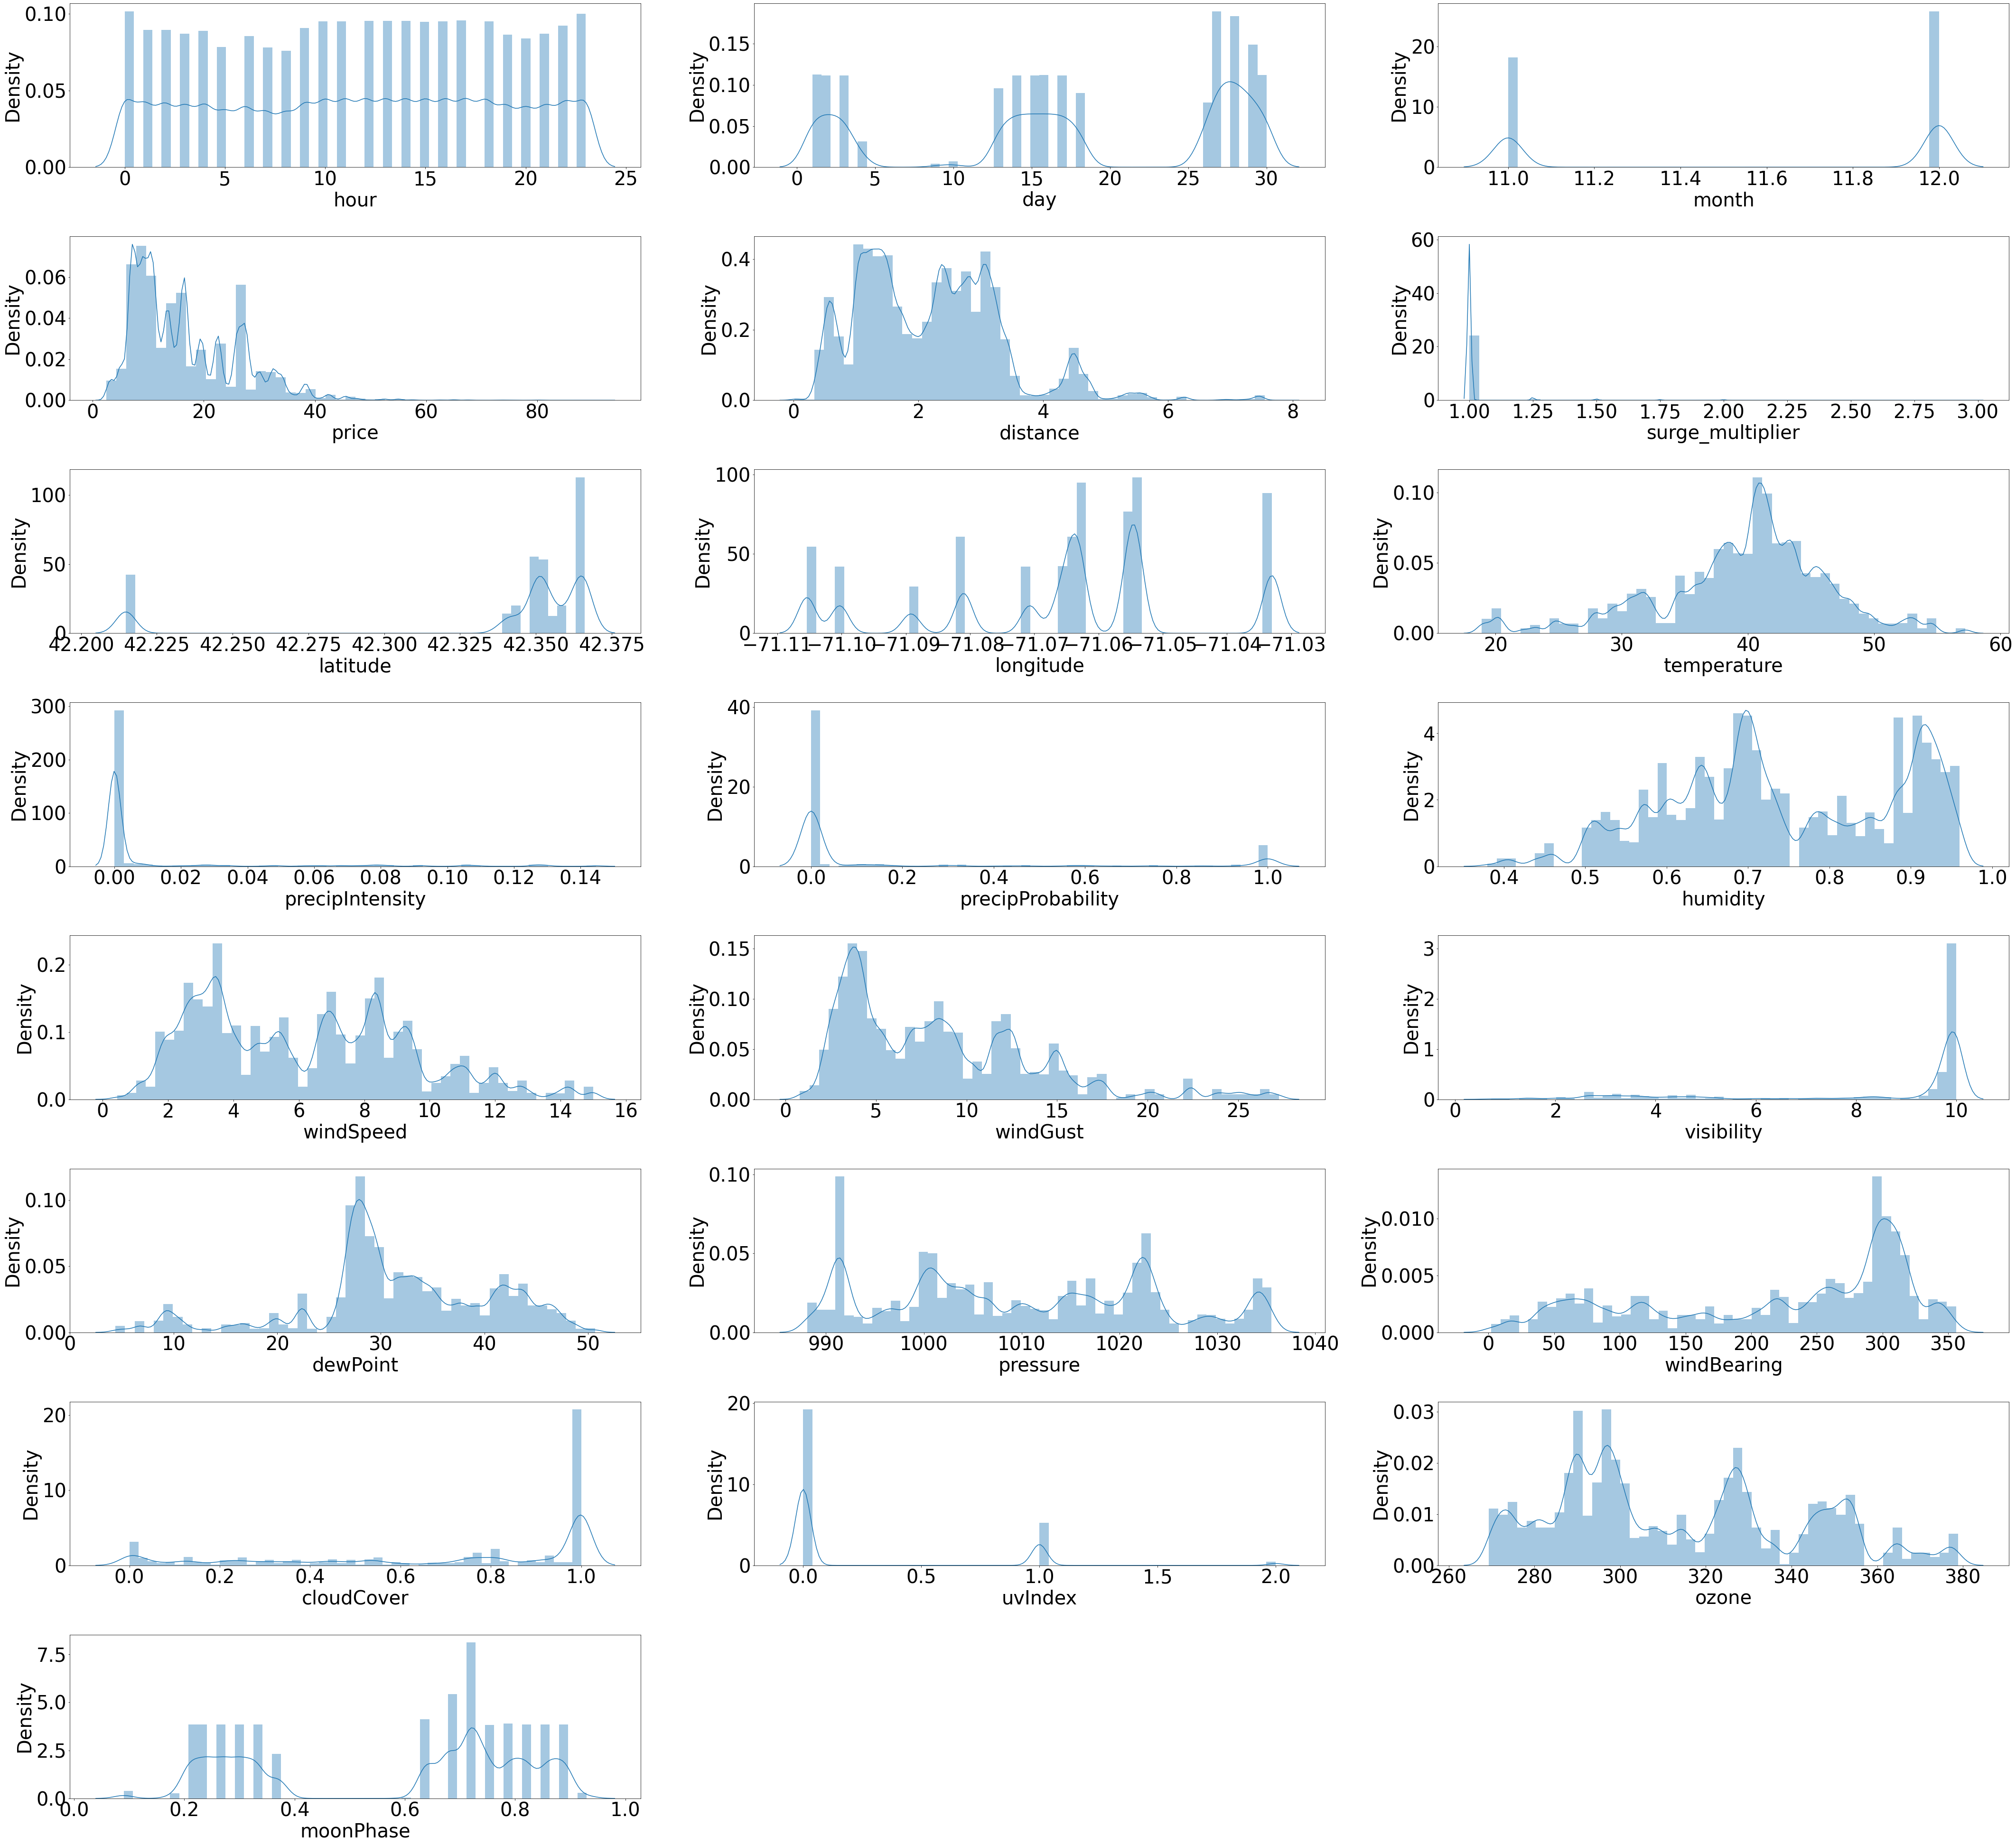

In [52]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 40})
j=1
for column in num_col:
    plt.subplot(8,3,j)
    sns.distplot(num_col[column])
    plt.tight_layout()
    j=j+1

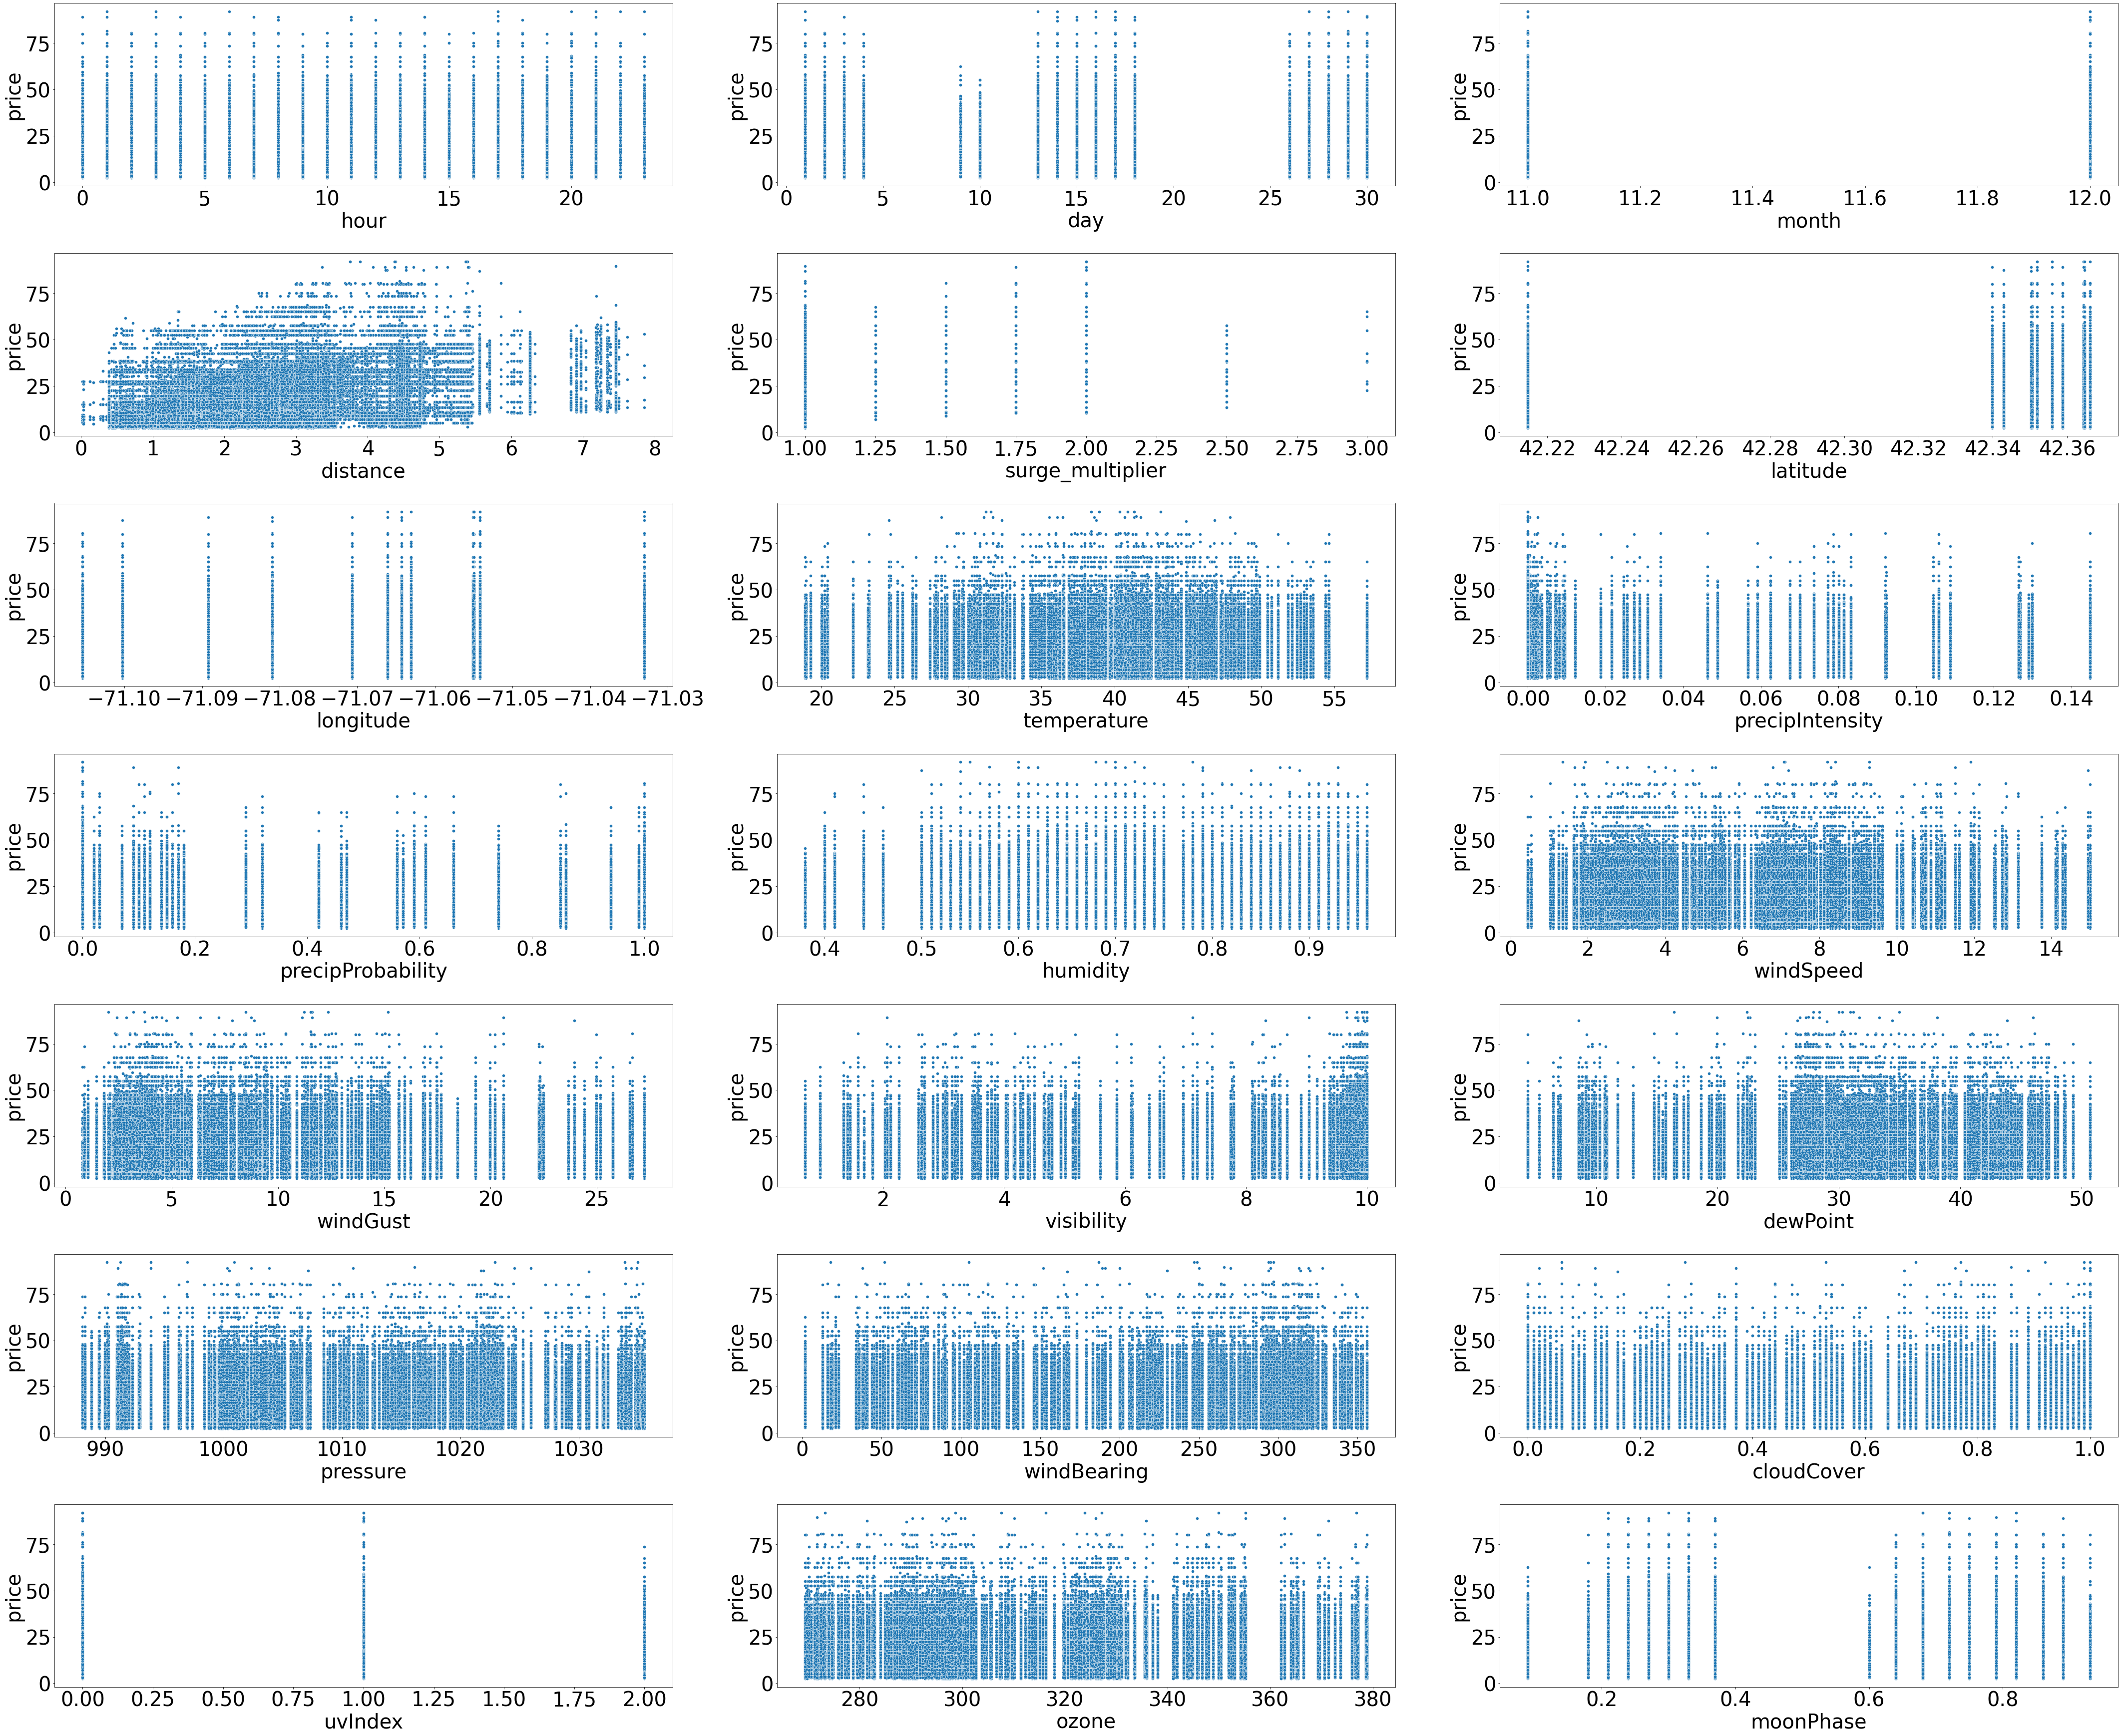

In [53]:
plt.figure(figsize = (60,55))
plt.rcParams.update({'font.size': 40})
j = 1
for column in num_col:
    if column == 'price':
        continue
    else:
        plt.subplot(8,3,j)
        sns.scatterplot(x = num_col[column],y = num_col['price'])
        plt.tight_layout()
        j = j + 1

In [54]:
cat_col1 = cat_col.copy()

In [55]:
cat_col['price'] = df['price']

In [56]:
plt.figure(figsize=(70,69))
plt.rcParams.update({'font.size': 40})
j=1
for column in cat_col:
    if column=='price':
        continue
    else:
        plt.subplot(8,1,j)
        sns.boxplot(x=cat_col[column],y=cat_col['price'])
        plt.tight_layout()
        j=j+1

In [ ]:
corr = num_col.corr()

NameError: name 'num_col' is not defined

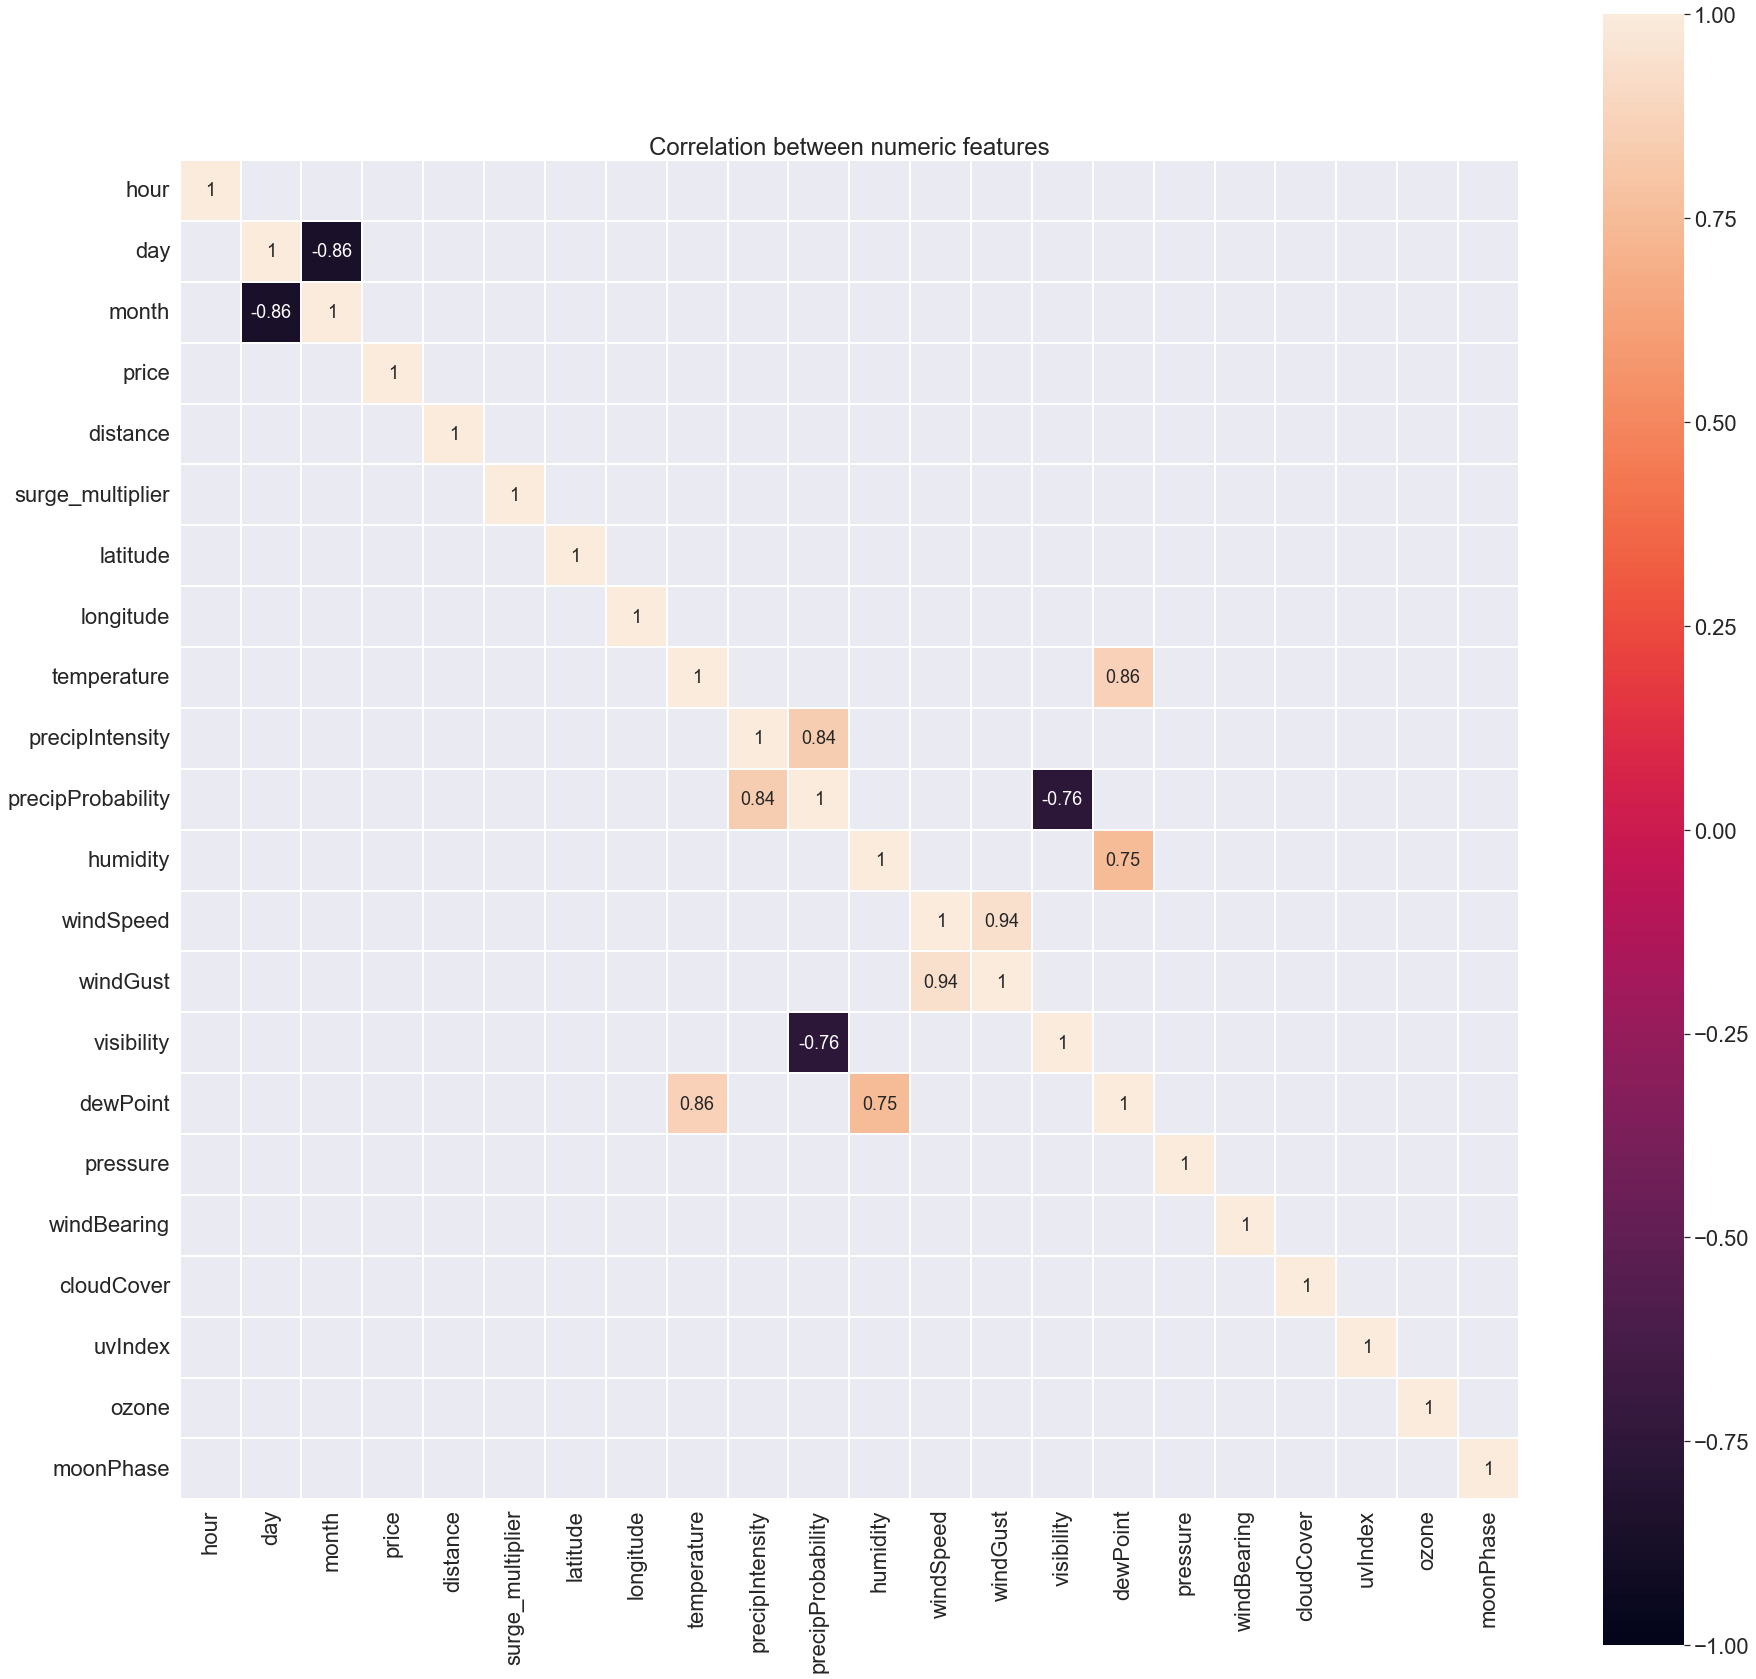

In [ ]:
# set figure size
plt.figure(figsize=(30, 30))

# set condition to get a strong correlation between the variables
sns.set(font_scale=2)
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)],
            vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={"size": 18}, square=True);

# specify name of the plot
plt.title('Correlation between numeric features')
plt.show()

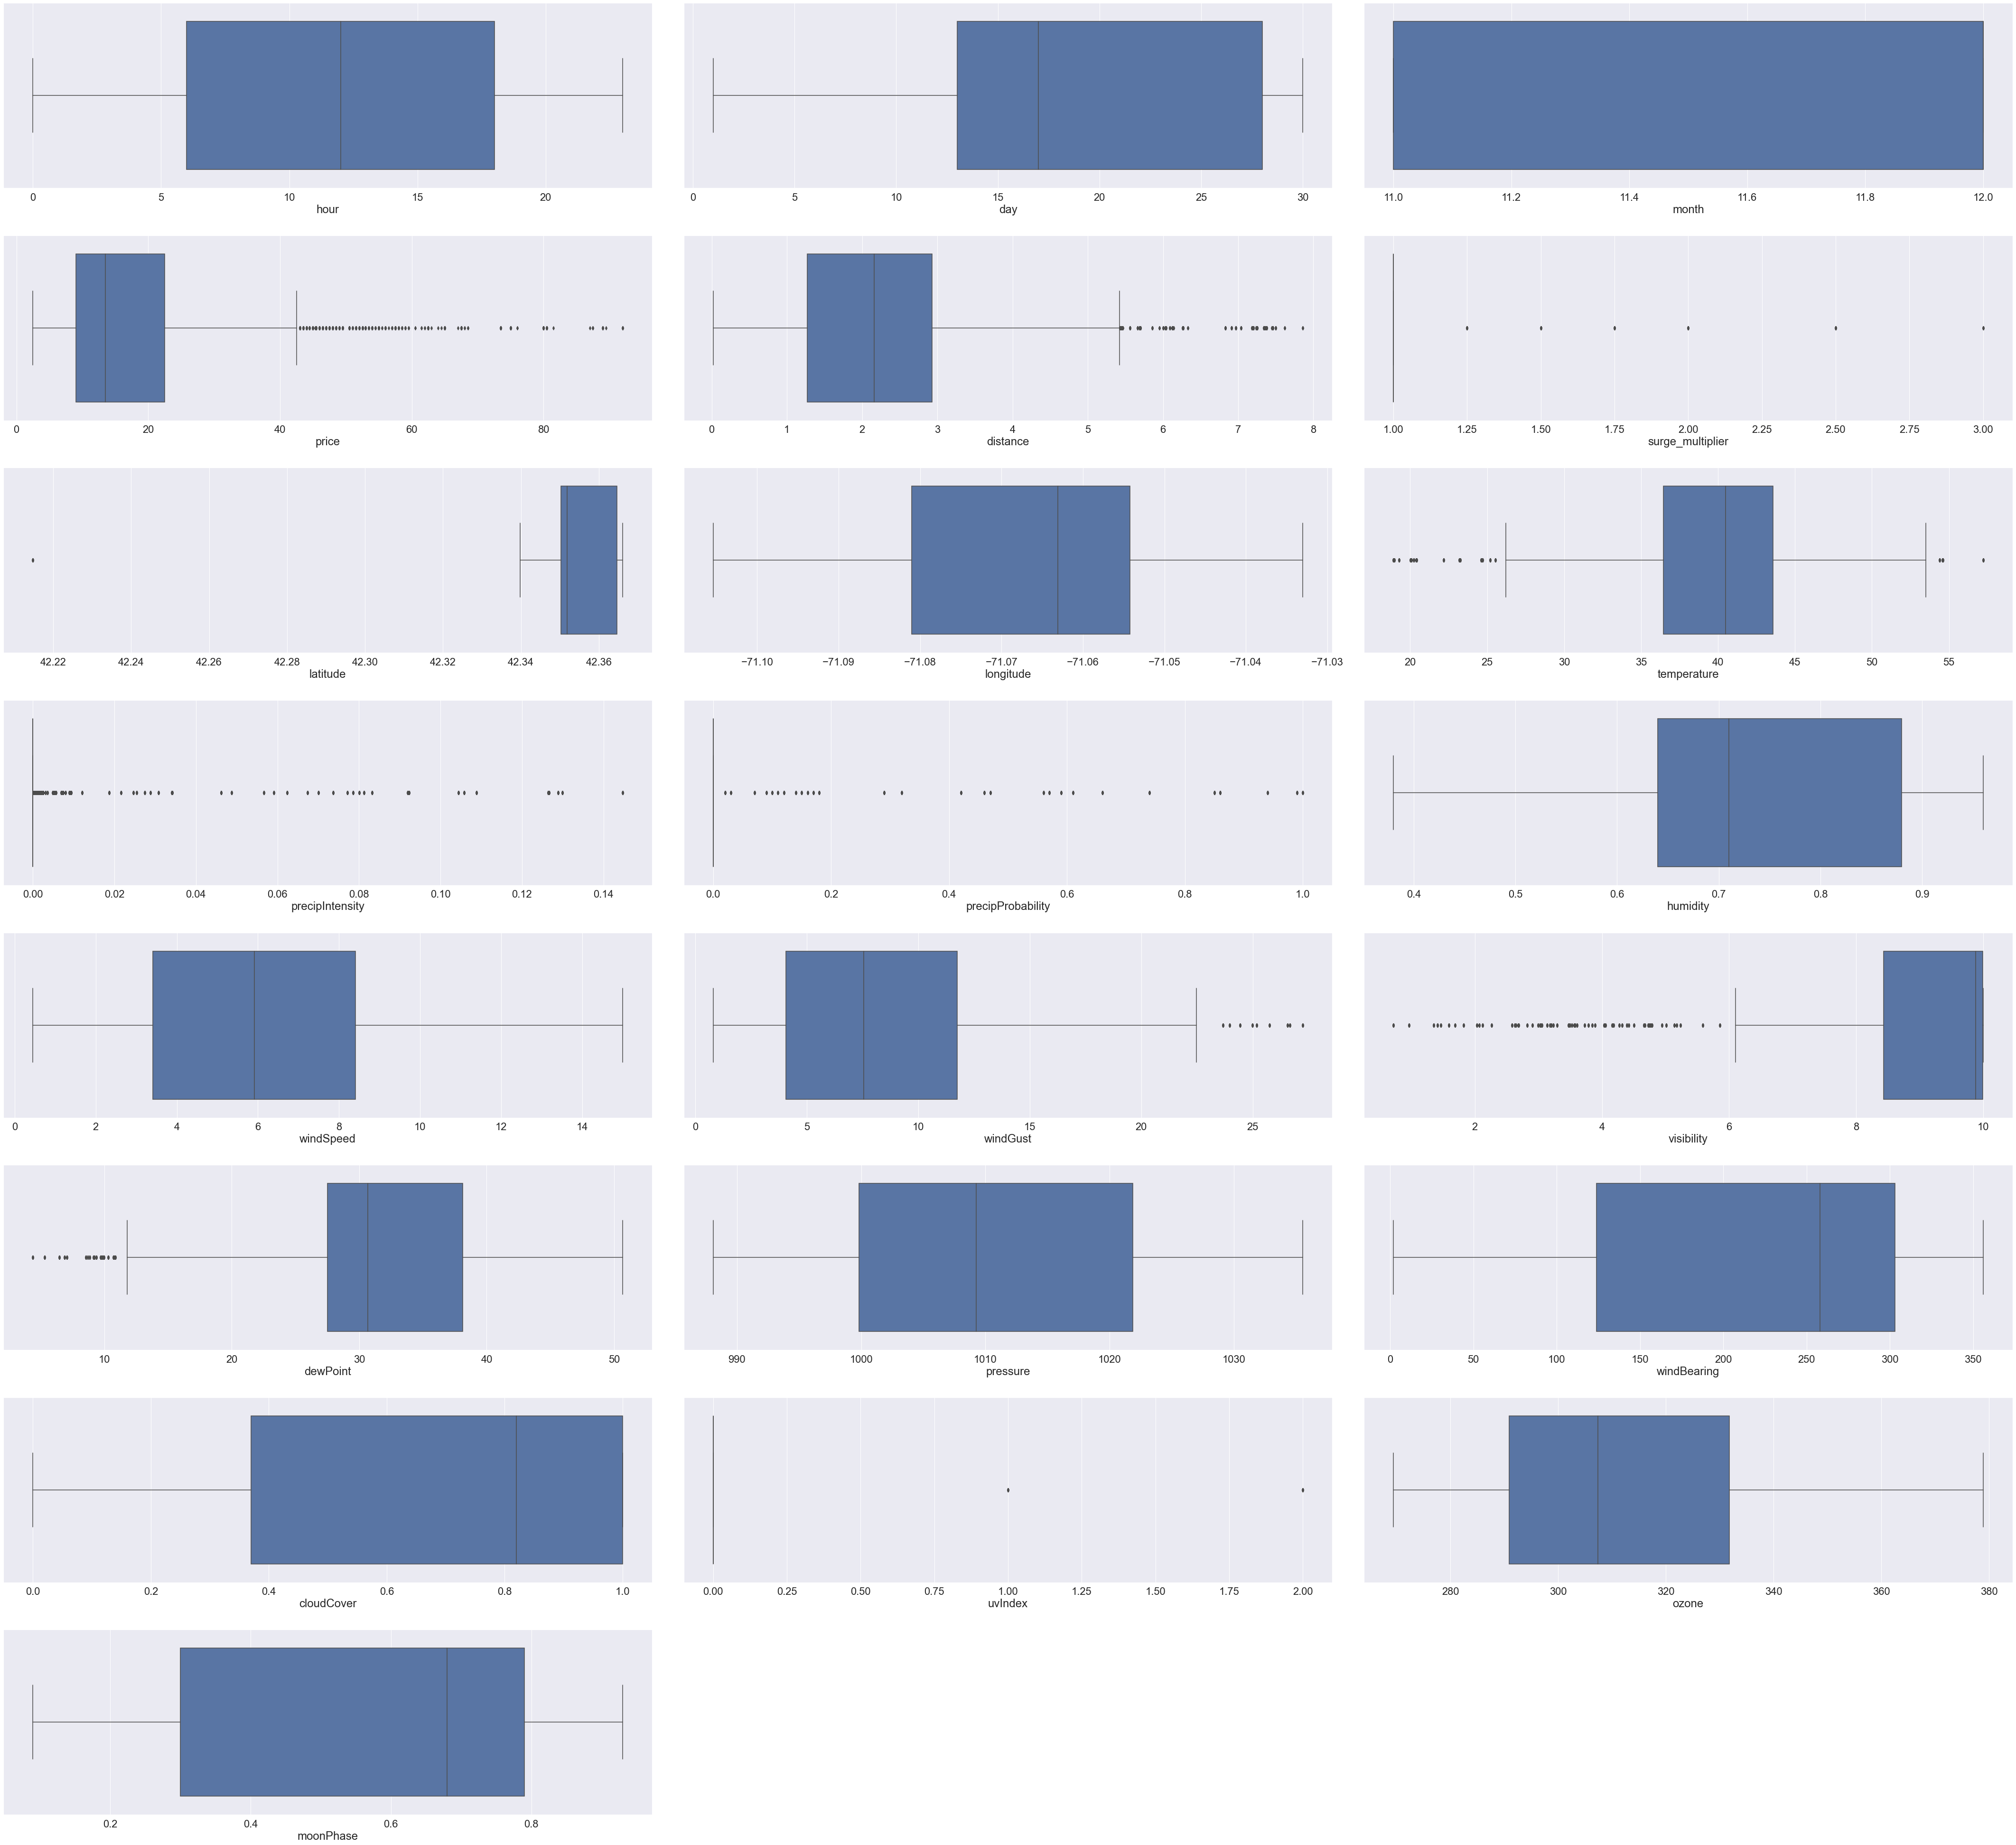

In [ ]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 40})
j=1
for column in num_col:
    plt.subplot(8,3,j)
    sns.boxplot(x=num_col[column])
    plt.tight_layout()
    j=j+1

In [ ]:
data2 = df4[['price','distance','latitude','temperature','windGust','visibility','dewPoint']]

In [ ]:
#Outlier Treatment
#Outlier Treatment
#Capping the outliers #Winsorization
for i in data2.columns:
    q1=data2[i].quantile(0.25)
    q3=data2[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=data2[i].quantile(0.99)
    lc=data2[i].quantile(0.01)
    for ind1 in data2[i].index:
        if data2.loc[ind1, i] >ub:            
            data2.loc[ind1, i] =uc
        if data2.loc[ind1, i] < lb:
            data2.loc[ind1, i] =lc

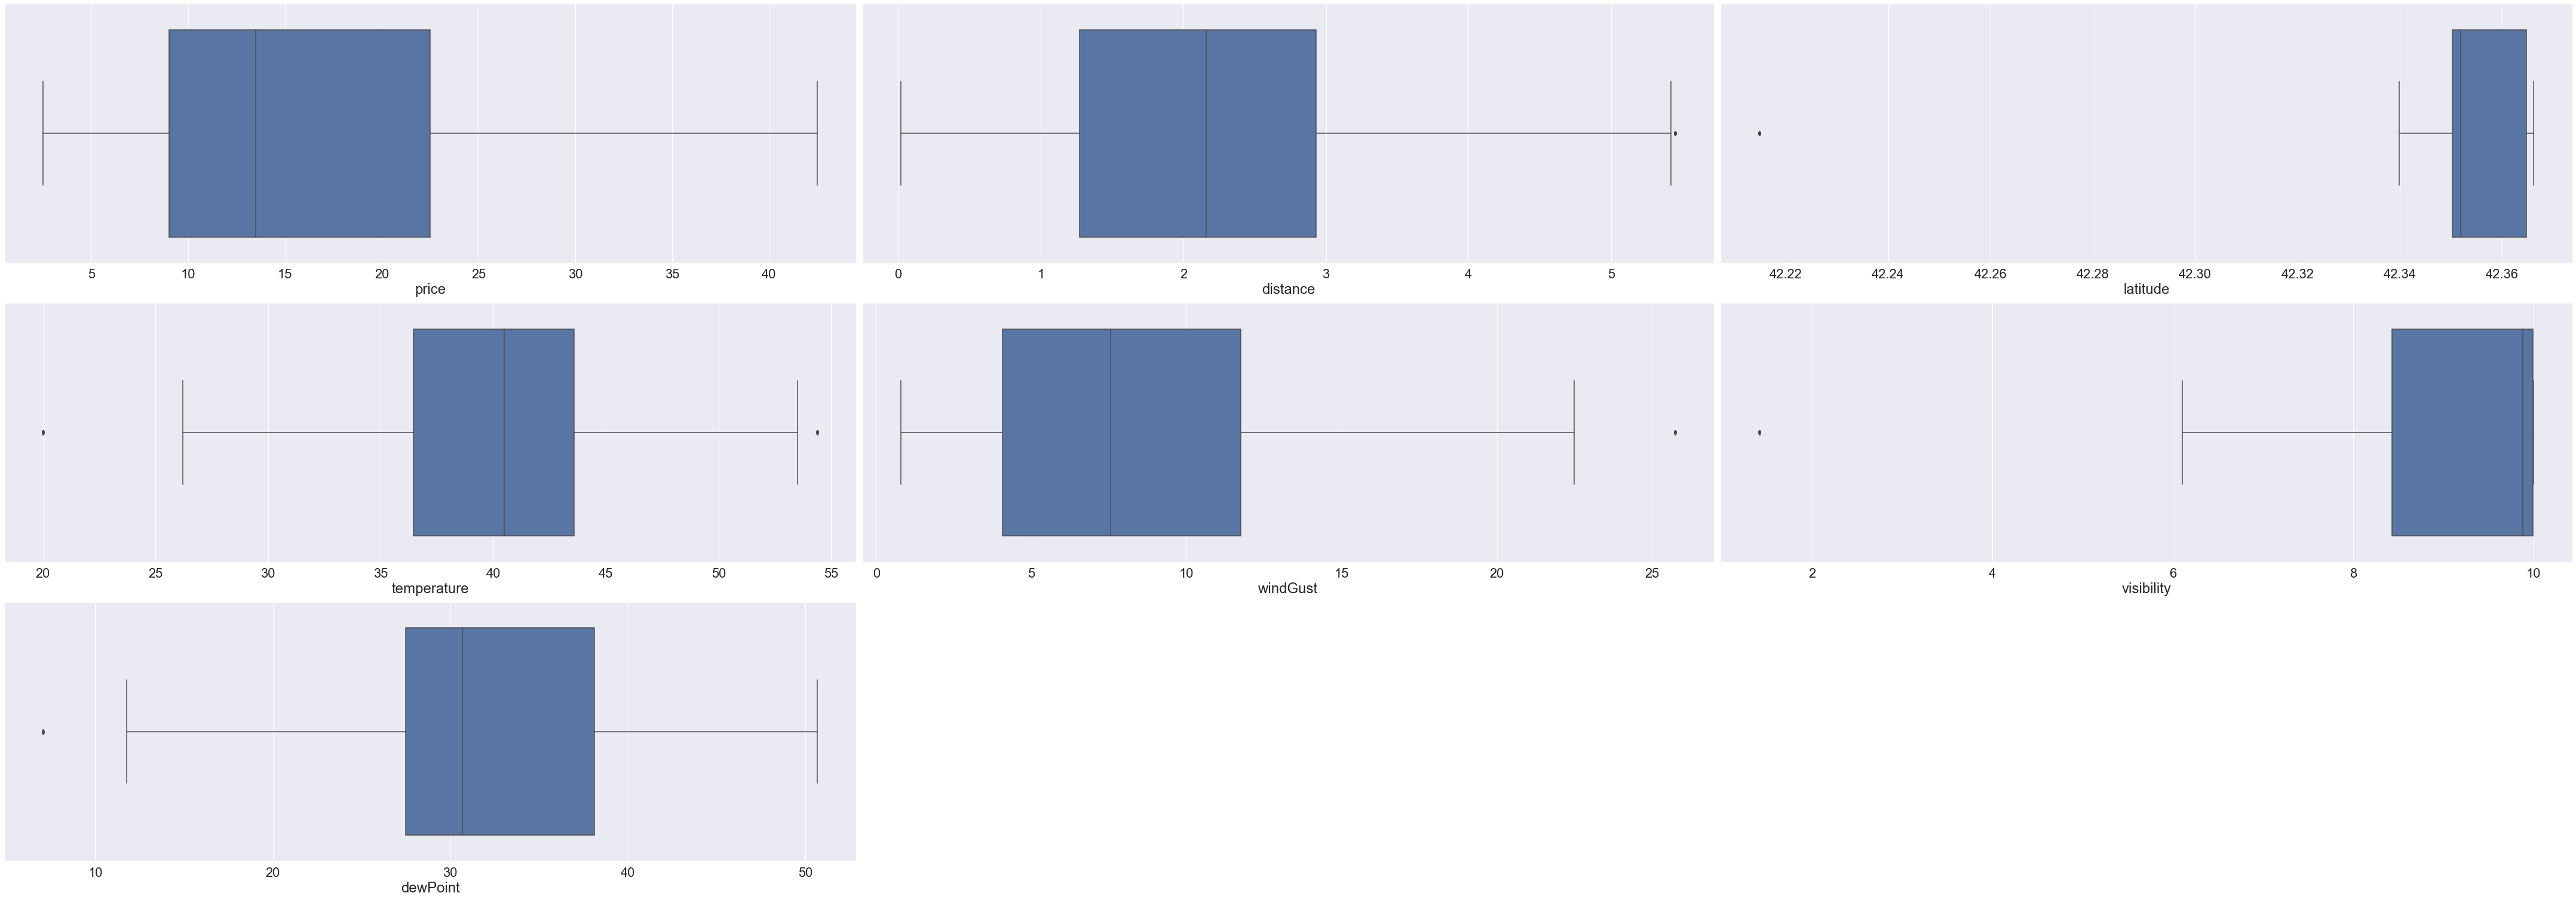

In [ ]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 10})
j=1
for column in data2:
    plt.subplot(8,3,j)
    sns.boxplot(x=data2[column])
    plt.tight_layout()
    j=j+1

In [ ]:
df4.columns

Index(['hour', 'day', 'month', 'source', 'cab_type', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'moonPhase'],
      dtype='object')

In [ ]:
df4.head()

hour  day  month            source cab_type          name  price  distance  \
0     9   16     12  Haymarket Square     Lyft        Shared    5.0      0.44   
1     2   27     11  Haymarket Square     Lyft           Lux   11.0      0.44   
2     1   28     11  Haymarket Square     Lyft          Lyft    7.0      0.44   
3     4   30     11  Haymarket Square     Lyft  Lux Black XL   26.0      0.44   
4     3   29     11  Haymarket Square     Lyft       Lyft XL    9.0      0.44   

   surge_multiplier  latitude  longitude  temperature    short_summary  \
0               1.0   42.2148    -71.033        42.34   Mostly Cloudy    
1               1.0   42.2148    -71.033        43.58            Rain    
2               1.0   42.2148    -71.033        38.33           Clear    
3               1.0   42.2148    -71.033        34.38           Clear    
4               1.0   42.2148    -71.033        37.44   Partly Cloudy    

   precipIntensity  precipProbability  humidity  windSpeed  windGust  \
0           0.0000                0.0      0.68       8.66      9.17   
1           0.1299                1.0      0.94      11.98     11.98   
2           0.0000                0.0      0.75       7.33      7.33   
3           0.0000                0.0      0.73       5.28      5.28   
4           0.0000                0.0      0.70       9.14      9.14   

   visibility  dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  \
0      10.000     32.70   1021.98           57        0.72        0  303.8   
1       4.786     41.83   1003.97           90        1.00        0  291.1   
2      10.000     31.10    992.28          240        0.03        0  315.7   
3      10.000     26.64   1013.73          310        0.00        0  291.1   
4      10.000     28.61    998.36          303        0.44        0  347.7   

   moonPhase  
0       0.30  
1       0.64  
2       0.68  
3       0.75  
4       0.72

# **DATA PREPROCESSING**
---

## *1. Hapus Fitur yang Tidak Berguna*

Kita akan menghapus beberapa fitur yang tidak digunakan dengan membuat dataframe baru.

In [ ]:
# For further modelling i don't think we need date related features. But maybe we need them in the future analysis.
# so i will make new dataframe

ddf = df.drop(['id','timestamp','datetime','long_summary',
               'apparentTemperatureHighTime','apparentTemperatureLowTime',
               'apparentTemperatureLowTime','windGustTime',
               'sunriseTime','sunsetTime','uvIndexTime',
               'temperatureMinTime','temperatureMaxTime',
               'apparentTemperatureMinTime','temperatureLowTime',
               'apparentTemperatureMaxTime'],axis=1)

In [ ]:
ddf.shape

(637975, 41)

### Korelasi Fitur-Fitur Suhu dengan Harga
---

Tujuan kita saat ini membuat model linear regression. Pertama-tama, kita akan memeriksa korelasi fitur yang berkaitan dengan temperatur dan target fitur yaitu Price.

In [ ]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh',
            'temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin',
            'temperatureHighTime','temperatureMax',
            'apparentTemperatureMin','apparentTemperatureMax',
            'price']

In [ ]:
df_temp = ddf[temp_cols]
df_temp.head()

temperature  apparentTemperature  temperatureHigh  temperatureLow  \
0        42.34                37.12            43.68           34.19   
1        43.58                37.35            47.30           42.10   
2        38.33                32.93            47.55           33.10   
3        34.38                29.63            45.03           28.90   
4        37.44                30.88            42.18           36.71   

   apparentTemperatureHigh  apparentTemperatureLow  temperatureMin  \
0                    37.95                   27.39           39.89   
1                    43.92                   36.20           40.49   
2                    44.12                   29.11           35.36   
3                    38.53                   26.20           34.67   
4                    35.75                   30.29           33.10   

   temperatureHighTime  temperatureMax  apparentTemperatureMin  \
0           1544968800           43.68                   33.73   
1           1543251600           47.30                   36.20   
2           1543320000           47.55                   31.04   
3           1543510800           45.03                   30.30   
4           1543420800           42.18                   29.11   

   apparentTemperatureMax  price  
0                   38.07    5.0  
1                   43.92   11.0  
2                   44.12    7.0  
3                   38.53   26.0  
4                   35.75    9.0

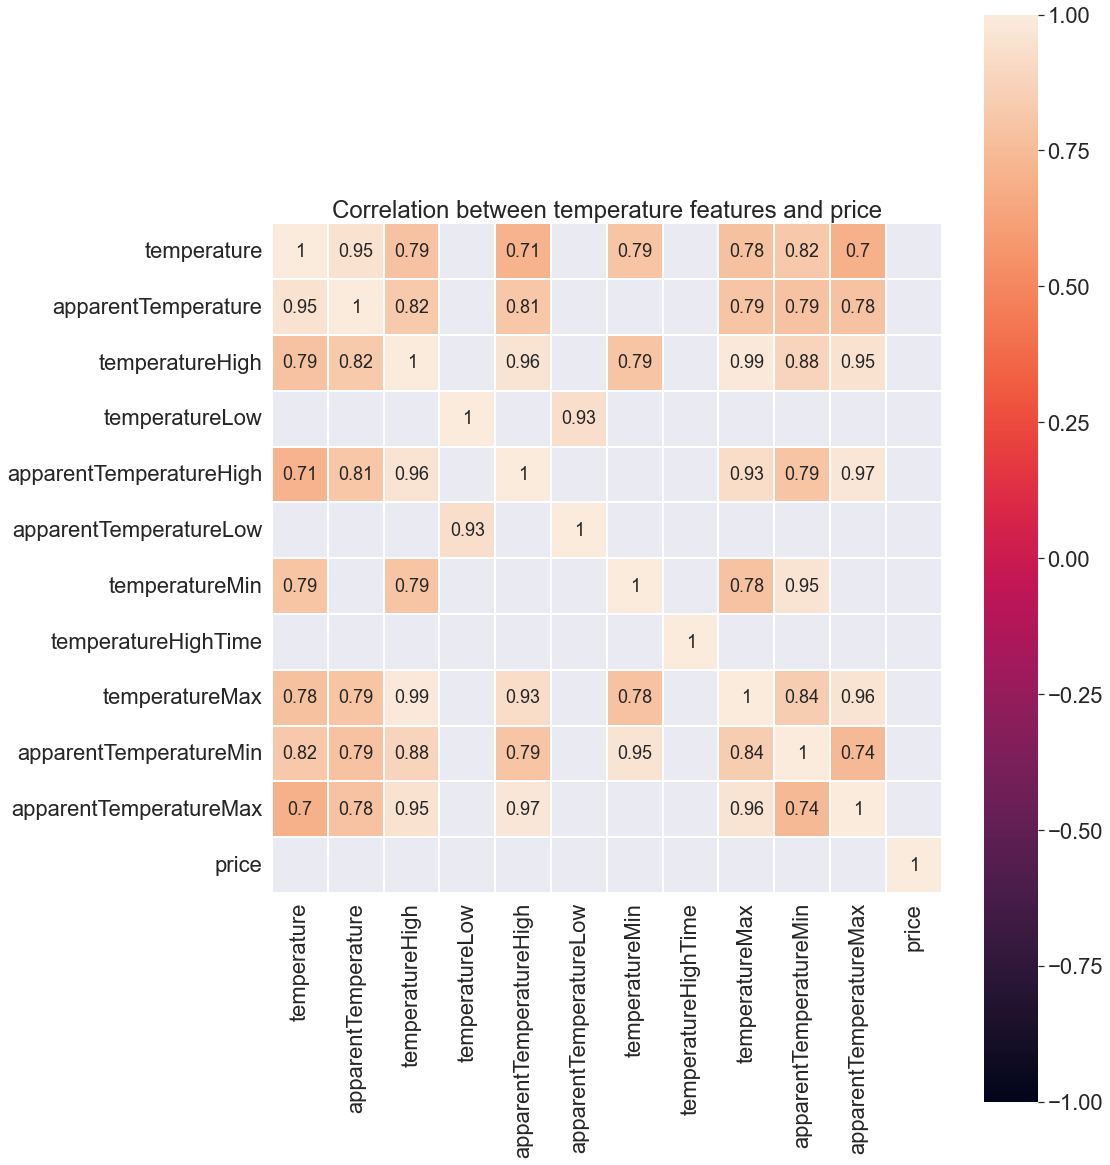

In [ ]:
corr_temp = df_temp.corr()

plt.figure(figsize=(15,20))
sns.heatmap(corr_temp[(corr_temp >= 0.7) | (corr_temp <= -0.7)],
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True)

plt.title('Correlation between temperature features and price')
plt.show()

Berdasarkan heatmap diatas semua fitur yang berkaitan dengan suhu memiliki korelasi yang lemah dengan target fitur kita yaitu price.

Lalu kita akan menghapus semua yang tidak memberi dampak apapun terhadap model regresi kita.

In [ ]:
ddf = ddf.drop(['temperature','apparentTemperature','temperatureHigh',
                'temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin',
                'temperatureHighTime','temperatureMax',
                'apparentTemperatureMin','apparentTemperatureMax'],axis=1)
ddf.shape

(637975, 30)

### Korelasi Fitur-Fitur Iklim dengan Harga
---

Kedua, kita akan memeriksa korelasi fitur yang berkaitan dengan iklim dan target fitur yaitu Price.

In [ ]:
climate_column = ['precipIntensity', 'precipProbability',
                  'humidity', 'windSpeed', 'windGust',
                  'visibility', 'dewPoint', 'pressure',
                  'windBearing','cloudCover', 'uvIndex', 'ozone',
                  'moonPhase','precipIntensityMax','price']
df_clim = ddf[climate_column]
df_clim.head()

precipIntensity  precipProbability  humidity  windSpeed  windGust  \
0           0.0000                0.0      0.68       8.66      9.17   
1           0.1299                1.0      0.94      11.98     11.98   
2           0.0000                0.0      0.75       7.33      7.33   
3           0.0000                0.0      0.73       5.28      5.28   
4           0.0000                0.0      0.70       9.14      9.14   

   visibility  dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  \
0      10.000     32.70   1021.98           57        0.72        0  303.8   
1       4.786     41.83   1003.97           90        1.00        0  291.1   
2      10.000     31.10    992.28          240        0.03        0  315.7   
3      10.000     26.64   1013.73          310        0.00        0  291.1   
4      10.000     28.61    998.36          303        0.44        0  347.7   

   moonPhase  precipIntensityMax  price  
0       0.30              0.1276    5.0  
1       0.64              0.1300   11.0  
2       0.68              0.1064    7.0  
3       0.75              0.0000   26.0  
4       0.72              0.0001    9.0

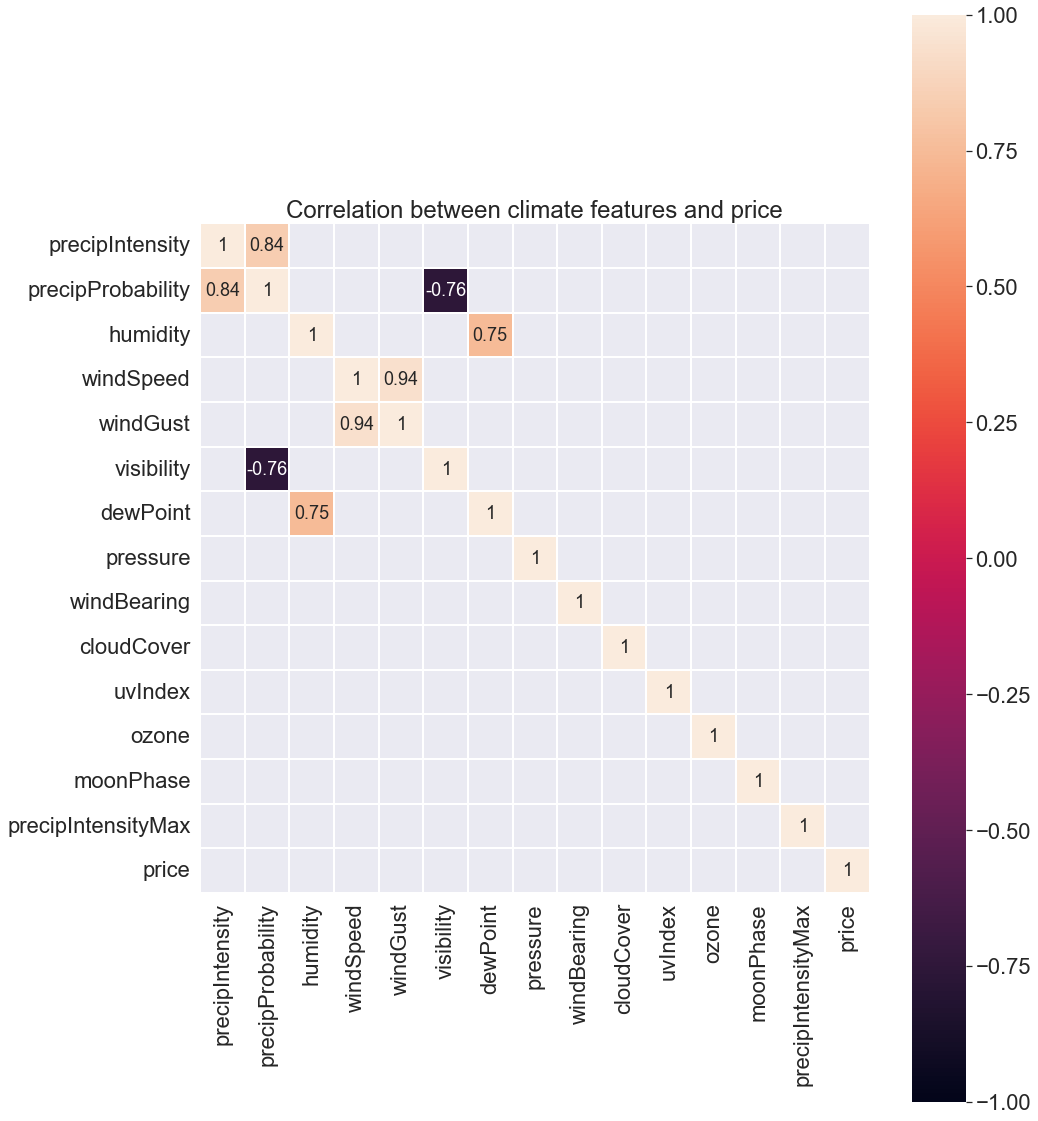

In [ ]:
corr_clim = df_clim.corr()

plt.figure(figsize=(15,20))
sns.heatmap(corr_clim[(corr_clim >= 0.7) | (corr_clim <= -0.7)],
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True)

plt.title('Correlation between climate features and price')
plt.show()

Seperti sebelumnya, semua fitur yang berkaitan dengan iklim juga memiliki korelasi yang lemah dengan fitur target kita yaitu price.

Sekali lagi, kita hapus semua fitur yang tidak membuat dampak apapun terhadap model regresi kita.

In [ ]:
ddf = ddf.drop(['precipIntensity', 'precipProbability', 'humidity',
                'windSpeed','windGust', 'visibility', 'dewPoint',
                'pressure', 'windBearing','cloudCover', 'uvIndex',
                'ozone', 'moonPhase','precipIntensityMax'],axis=1)
ddf.shape

(637975, 16)

### Cek Categorical Values dalam Fitur-Fitur Dataset
---

Ketiga, kita akan memeriksa nilai categorical yang ada di dalam fitur-fitur dataset.

In [ ]:
category_col = ddf.select_dtypes(include=['object','category']).columns.tolist()
for column in ddf[category_col]:
    print(f'{column} : {ddf[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

Kita dapat melihat bahwa fitur timezone hanya memiliki 1 nilai saja dan fitur product_id berisi banyak nilai-nilai yang tidak terdefinisi.

Mari kita hapus fitur-fitur itu

In [ ]:
ddf = ddf.drop(['timezone','product_id'],axis=1)

ddf.shape

(637975, 14)

### Korelasi Fitur-Fitur Categorical dengan Harga
---

Keempat, kita akan memeriksa korelasi fitur-fitur categorical dengan target fitur yaitu Price.

In [ ]:
new_cat = ['source','destination','cab_type','name','short_summary',
           'icon','price']

df_cat = ddf[new_cat]
df_cat.head()

source    destination cab_type          name    short_summary  \
0  Haymarket Square  North Station     Lyft        Shared   Mostly Cloudy    
1  Haymarket Square  North Station     Lyft           Lux            Rain    
2  Haymarket Square  North Station     Lyft          Lyft           Clear    
3  Haymarket Square  North Station     Lyft  Lux Black XL           Clear    
4  Haymarket Square  North Station     Lyft       Lyft XL   Partly Cloudy    

                    icon  price  
0   partly-cloudy-night     5.0  
1                  rain    11.0  
2           clear-night     7.0  
3           clear-night    26.0  
4   partly-cloudy-night     9.0

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [ ]:
df_cat_encode

source  destination  cab_type  name  short_summary  icon  price
0            5            7         0     7              4     5    5.0
1            5            7         0     2              8     6   11.0
2            5            7         0     5              0     1    7.0
3            5            7         0     4              0     1   26.0
4            5            7         0     6              6     5    9.0
...        ...          ...       ...   ...            ...   ...    ...
693065      11            6         1    11              6     5    9.5
693066      11            6         1    10              6     5   13.0
693067      11            6         1     9              6     5    9.5
693069      11            6         1     1              6     5   27.0
693070      11            6         1     8              6     5   10.0

[637975 rows x 7 columns]

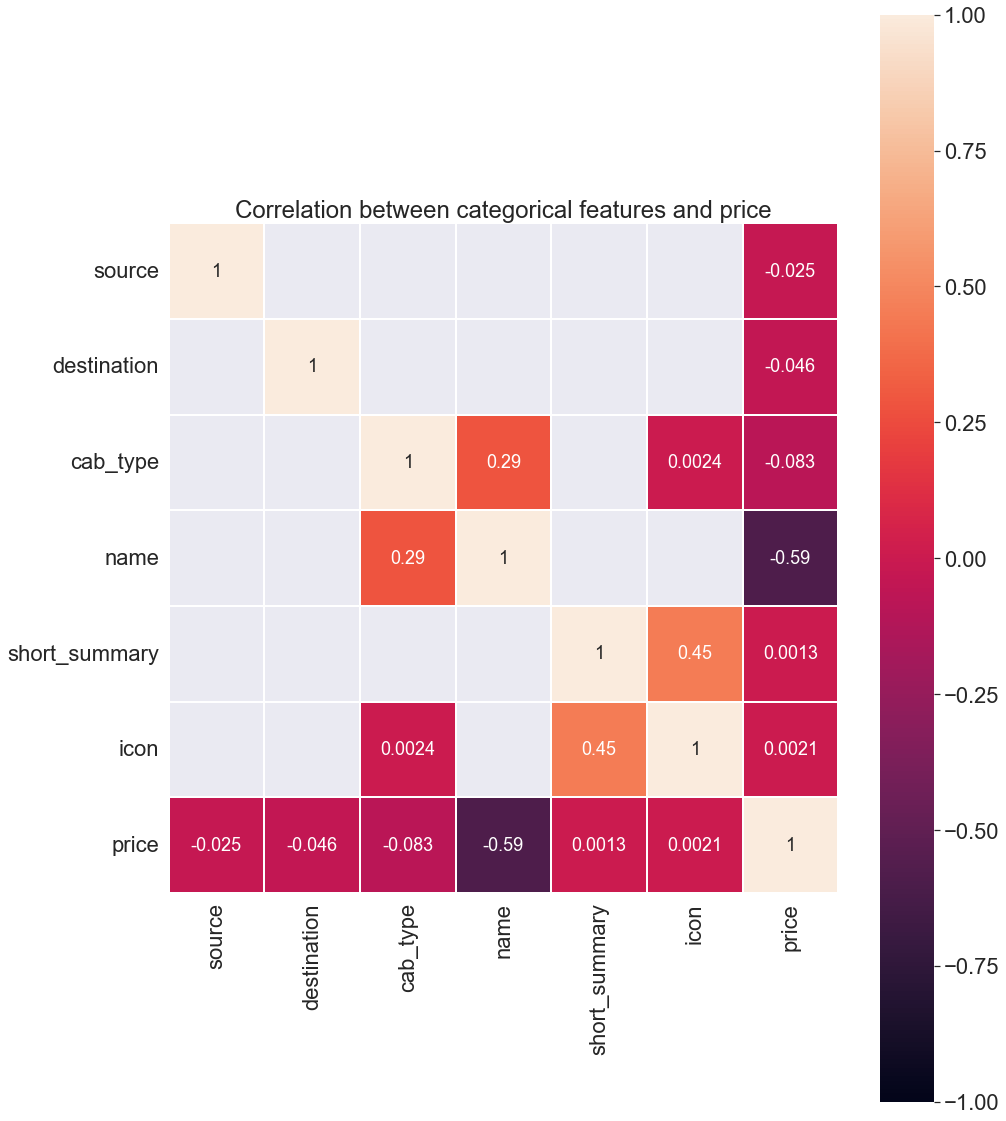

In [ ]:
corr_cat = df_cat_encode.corr()

plt.figure(figsize=(15,20))
sns.heatmap(corr_cat[(corr_cat >= 0.001) | (corr_cat <= -0.01)],
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True)

plt.title('Correlation between categorical features and price')
plt.show()

Berdasarkan heatmap diatas hanya fitur name yang memiliki korelasi yang relatif kuat daripada fitur-fitur lainnya. Fitur-fitur yang memiliki korelasi yang relatif lemah yaitu source, destination, dan cab_type.

Kita akan menghapus fitur-fitur yang memiliki korelasi yang relatif lemah kecuali cab_type. Fitur cab_type memiliki korelasi yang lebih kuat daripada 2 fitur lainnya.

In [ ]:
ddf = ddf.drop(['source','destination','short_summary','icon'],axis=1)

ddf.head()

hour  day  month cab_type          name  price  distance  surge_multiplier  \
0     9   16     12     Lyft        Shared    5.0      0.44               1.0   
1     2   27     11     Lyft           Lux   11.0      0.44               1.0   
2     1   28     11     Lyft          Lyft    7.0      0.44               1.0   
3     4   30     11     Lyft  Lux Black XL   26.0      0.44               1.0   
4     3   29     11     Lyft       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  
0   42.2148    -71.033  
1   42.2148    -71.033  
2   42.2148    -71.033  
3   42.2148    -71.033  
4   42.2148    -71.033

Selain itu, kita akan menghapus beberapa fitur seperti hour, day,month, latitude, longitude karena kita tidak membutuhkan mereka untuk saat ini

In [ ]:
ddf = ddf.drop(['hour','day','month','latitude','longitude'],axis=1)

ddf.head()

cab_type          name  price  distance  surge_multiplier
0     Lyft        Shared    5.0      0.44               1.0
1     Lyft           Lux   11.0      0.44               1.0
2     Lyft          Lyft    7.0      0.44               1.0
3     Lyft  Lux Black XL   26.0      0.44               1.0
4     Lyft       Lyft XL    9.0      0.44               1.0

In [ ]:
ddf.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

In [ ]:
ddf.describe()

price       distance  surge_multiplier
count  637975.000000  637975.000000     637975.000000
mean       16.544999       2.189258          1.015066
std         9.323815       1.135410          0.095414
min         2.500000       0.020000          1.000000
25%         9.000000       1.270000          1.000000
50%        13.500000       2.160000          1.000000
75%        22.500000       2.930000          1.000000
max        92.000000       7.860000          3.000000

In [ ]:
ddf = ddf.select_dtypes('number')
ddf

price  distance  surge_multiplier
0         5.0      0.44               1.0
1        11.0      0.44               1.0
2         7.0      0.44               1.0
3        26.0      0.44               1.0
4         9.0      0.44               1.0
...       ...       ...               ...
693065    9.5      1.00               1.0
693066   13.0      1.00               1.0
693067    9.5      1.00               1.0
693069   27.0      1.00               1.0
693070   10.0      1.00               1.0

[637975 rows x 3 columns]

## *2. Removing Outliers*

Sebelumnya kita sudah menghapus outliers pada fitur price berdasarkan harga maksimum. Sekarang kita akan memeriksa outlier lain yang kemunginan ada

Kita akan menggunakan metode Interquartil Range (IQR) untuk memeriksa batas atas dan batas bawah pencilan

In [ ]:
Q1 = ddf['price'].quantile(0.25)
Q3 = ddf['price'].quantile(0.75)
IQR = Q3-Q1

In [ ]:
# harga yang melebihi batas atas
ddf[ddf['price']>(Q3+(1.5*IQR))]

price  distance  surge_multiplier
706      52.5      3.25              2.00
707      67.5      3.25              2.00
769      45.5      4.76              1.00
1094     45.5      4.31              1.00
1318     45.5      5.33              1.00
...       ...       ...               ...
692439   47.0      5.56              1.00
692698   52.5      4.58              1.25
692891   47.5      5.42              1.00
692962   51.0      7.36              1.00
693007   49.5      7.36              1.00

[5588 rows x 3 columns]

In [ ]:
# harga yang melebihi batas bawah
ddf[ddf['price']<(Q1-(1.5*IQR))]

Empty DataFrame
Columns: [price, distance, surge_multiplier]
Index: []

Dapat kita simpulkan bahwa kita memiliki 5588 data outliers. Lalu kita akan menghapusnya.

In [ ]:
print('Size before removing :',ddf.shape)
ddf= ddf[~((ddf['price']>(Q3+(1.5*IQR))))]
print('Size after removing :',ddf.shape)

Size before removing : (637975, 3)
Size after removing : (632387, 3)


## *3. Encoding Data*

transformasi data

In [ ]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [ ]:
ddf_onehot = ddf.copy()
for col in ddf_onehot.select_dtypes(include='O').columns:
    ddf_onehot=one_hot_encoder(ddf_onehot,col)
    
ddf_onehot.head()

price  distance  surge_multiplier
0    5.0      0.44               1.0
1   11.0      0.44               1.0
2    7.0      0.44               1.0
3   26.0      0.44               1.0
4    9.0      0.44               1.0

## *4. Splitting Data*

Pilih fitur yang akan digunakan sebagai input dan target prediksi.

In [ ]:
# prepare the training set and testing set

# memilih semua fitur kecuali fitur target
x = ddf_onehot.drop(['price'],axis=1)
# memilih fitur target
y = pd.DataFrame(ddf_onehot['price'])

In [ ]:
print('size of x = {0}'.format(x.shape))
print('size of y = {0}'.format(y.shape))
print(x.shape != y.shape)

size of x = (632387, 2)
size of y = (632387, 1)
True


Tahapan selanjutnya adalah melakukan pemisahan data untuk training dan testing.

Mengapa ini penting? Hal ini diperlukan agar kita bisa melihat bagaimana algoritma belajar untuk melakukan prediksi pada testing data. Kita akan membagi data menjadi 70% training dan 30% testing menggunakan fungsi train_test_split() dari sklearn.model_selection.

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of x_train is:",x_train.shape)

# print dimension of predictors test set
print("The shape of x_test is:",x_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of x_train is: (442670, 2)
The shape of x_test is: (189717, 2)
The shape of y_train is: (442670, 1)
The shape of y_test is: (189717, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **DATA MODELLING**
---

### 1. Linear Regression

Sebelumnya kita telah melakukan pemisahan data untuk training dan testing, langkah berikutnya yaitu mendefiniskan model yang akan kita pakai.

Kita harus mengimpor LinearRegression dari sklearn.linear_model dan membuat objek dari kelas LinearRegression.

In [ ]:
from sklearn.linear_model import LinearRegression

# model regression
LR = LinearRegression(normalize=True)
LR

LinearRegression(normalize=True)

Langkah berikutnya yaitu melakukan pelatihan pada model

Sekarang kita akan memasukkan x dan y kita ke dalam model machine learning untuk memprediksi hasilnya

In [ ]:
LR.fit(x_train, y_train)

LinearRegression(normalize=True)

In [ ]:
print('Train Score : ', LR.score(x_train,y_train))
print('Test Score : ', LR.score(x_test,y_test))

Train Score :  0.12140183469615973
Test Score :  0.11951021258765038


**TEST MODEL**

Saatnya kita membuat beberapa prediksi. Untuk melakukannya, kita akan menggunakan data pengujian kita dan melihat seberapa akurat algoritme kita memprediksi skor persentase.

Sekarang prediksi output dengan variabel x_test.

In [ ]:
# target prediction = Price
y_pred = LR.predict(x_test)
y_pred[:65]

array([[18.67936402],
       [14.30207745],
       [15.80286142],
       [17.32865845],
       [15.30260009],
       [13.12646334],
       [25.40432656],
       [16.82839713],
       [14.25205132],
       [17.77889364],
       [13.70176386],
       [13.15147641],
       [13.6767508 ],
       [15.55273076],
       [14.32709052],
       [13.37659401],
       [13.72677693],
       [16.87842326],
       [21.83101034],
       [14.55220811],
       [14.10197292],
       [14.87737797],
       [14.37711665],
       [13.20150254],
       [14.40212972],
       [14.55220811],
       [13.15147641],
       [14.95241717],
       [14.45215585],
       [12.17596683],
       [14.47716891],
       [13.75179   ],
       [16.77837099],
       [13.12646334],
       [18.52928562],
       [18.32918109],
       [22.00610181],
       [19.10458614],
       [18.52928562],
       [12.00087537],
       [17.75388057],
       [17.25361925],
       [14.97743024],
       [13.20150254],
       [15.60275689],
       [21

Sekarang mari kita uji keakuratan model kita untuk mengetahui performa model berdasarkan metrics yang kita pilih

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score = r2_score(y_test,  y_pred)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test, y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,  y_pred)))

In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
model = LR
pickle.dump(model, open('model.pkl','wb'))

**DIFFERENCE BETWEEN THE ACTUAL AND PREDICTED DATA**

In [ ]:
df0 = pd.DataFrame(np.c_[y_test, y_pred, y_pred-y_test], columns=['Actual', 'Predicted', 'Different'])
df0

Actual  Predicted  Different
0         27.5  18.679364  -8.820636
1          7.0  14.302077   7.302077
2         16.5  15.802861  -0.697139
3         19.5  17.328658  -2.171342
4         22.5  15.302600  -7.197400
...        ...        ...        ...
189712     4.5  10.700196   6.200196
189713     7.0  13.301555   6.301555
189714    27.0  17.203593  -9.796407
189715    17.5  12.901346  -4.598654
189716    36.0  18.379207 -17.620793

[189717 rows x 3 columns]

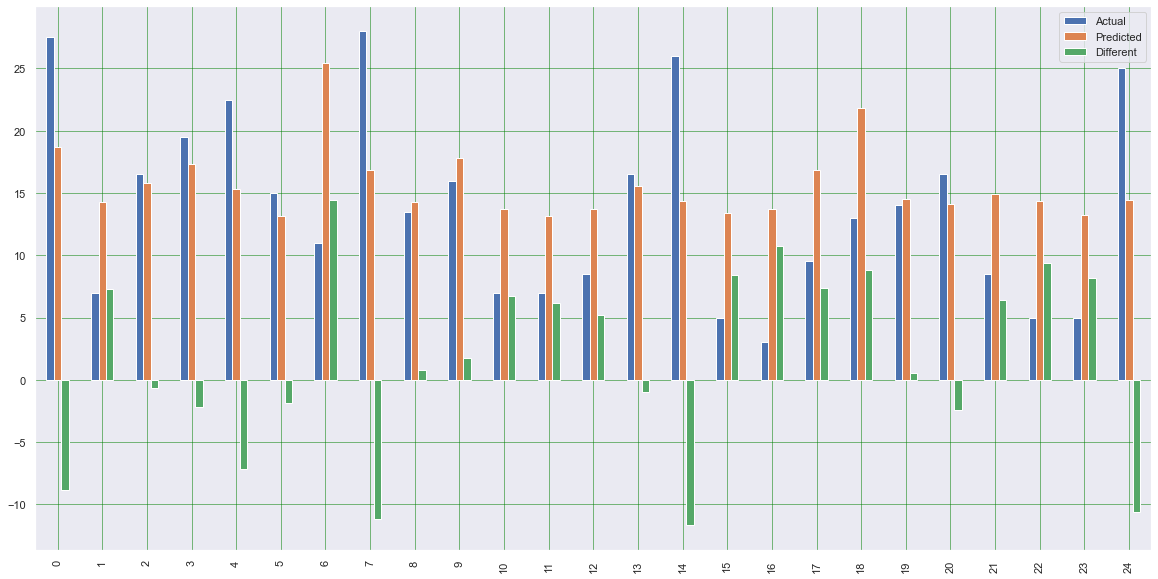

In [ ]:
df0 = df0.head(25)
df0.plot(kind='bar', figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### 2. Linear Regression with SGD

In [ ]:
# importing library min max scaler to scale data
from sklearn.preprocessing import MinMaxScaler
#import library for implement Linear Regression
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()
scaler.fit(x)

StandardScaler()

In [ ]:
x1= scaler.fit_transform(x)
x1

array([[-1.5514947 , -0.14698285],
       [-1.5514947 , -0.14698285],
       [-1.5514947 , -0.14698285],
       ...,
       [-1.049917  , -0.14698285],
       [-1.049917  , -0.14698285],
       [-1.049917  , -0.14698285]])

In [ ]:
y1=y
y1

price
0         5.0
1        11.0
2         7.0
3        26.0
4         9.0
...       ...
693065    9.5
693066   13.0
693067    9.5
693069   27.0
693070   10.0

[632387 rows x 1 columns]

In [ ]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X1_train is:",x1_train.shape)

# print dimension of predictors test set
print("The shape of X1_test is:",x1_test.shape)

# print dimension of target train set
print("The shape of y1_train is:",y1_train.shape)

# print dimension of target test set
print("The shape of y1_test is:",y1_test.shape)

The shape of X1_train is: (505909, 2)
The shape of X1_test is: (126478, 2)
The shape of y1_train is: (505909, 1)
The shape of y1_test is: (126478, 1)


In [ ]:
# build the model 
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 1000) #Instantiation

# fit the model
SGD_model.fit(x1_train, y1_train) #Training

SGDRegressor(alpha=0.1, loss='squared_loss')

In [ ]:
SGDRegressor(alpha=0.1, loss='squared_loss')

# predict the values
y1_pred_SGD  = SGD_model.predict(x1_test)
y1_pred_SGD

array([18.21990691, 14.50161744, 15.77645955, ..., 14.24664902,
       17.58248586, 17.37001218])

In [ ]:
r_squared_SGD = SGD_model.score(x1_train,y1_train)
# Number of observation or sample size
n = 159999 

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

# Compute RMSE
rmse_SGD = sqrt(mean_squared_error(y1_test, y1_pred_SGD))

In [ ]:
# compile the required information
LRM = pd.Series({'Model': "Linear regression with SGD",
                     'RMSE':rmse_SGD,
                     'R-Squared': r_squared_SGD,
                     'Adj. R-Squared': Adj_r_squared_SGD     
                   })

LRM = pd.DataFrame(LRM).T
LRM

Model      RMSE R-Squared Adj. R-Squared
0  Linear regression with SGD  8.242113  0.118865       0.118804

### 3. Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# instantiate the 'DecisionTreeRegressor' object using 'mse' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeRegressor(criterion = 'mse', random_state = 10) #Max depth D.Tree gets formed

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(x_train, y_train) #fit() method is defined inside the class 'DecisionTreeClassifier'

In [ ]:
y_pred_DT=decision_tree_model.predict(x_test)
y_pred_DT

array([18.69444444, 13.85426267, 16.021262  , ..., 17.31104294,
       13.11556169, 19.12075929])

In [ ]:
y_test

price
467221   27.5
142415    7.0
28600    16.5
463169   19.5
56092    22.5
...       ...
683396    4.5
621068    7.0
243299   27.0
553975   17.5
438381   36.0

[189717 rows x 1 columns]

In [ ]:
r_squared_DT=decision_tree_model.score(x_test,y_test)
# Number of observation or sample size
n = 189717 

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_DT = 1 - (1-r_squared_DT)*(n-1)/(n-p-1)
Adj_r_squared_DT

0.12237917807338694

In [ ]:
# Compute RMSE
rmse_DT = sqrt(mean_squared_error(y_test, y_pred_DT))

In [ ]:
# compile the required information
DTM = pd.Series({'Model': "Decision Tree Model ",
                     'RMSE':rmse_DT,
                     'R-Squared': r_squared_DT,
                     'Adj. R-Squared': Adj_r_squared_DT     
                   })

DTM = pd.DataFrame(DTM).T
DTM

Model      RMSE R-Squared Adj. R-Squared
0  Decision Tree Model   8.221417   0.12243       0.122379

# **PENGAMBILAN KESIMPULAN**
---

- Destination paling populer adalah Financial District.
- Luxurious cabs have higher average prices compared to the shared cabs.
- The most popular hour for ride requests is between 11:00 pm and 12:00 midnight.
- The most expensive hour to request for uber rides is at 9:00 am and 8:00 pm while for lyft is between 11:00 pm and 12:00 midnight.
- The regression model has a higher R Squared score compared to the Random Forest Regressor.

Ada perbedaan faktor-faktor yang mempengaruhi tarif taksi yang pelanggan harus tahu yaitu :
- Waktu
- Jarak
- Rute yang dilalui
- Tempat Asal dan Tempat Tujuan
- Perusahaan Jasa Layanan Transportasi. Lyft memiliki harga yang cukup mahal dibandingkan dengan Uber.
- Tipe Kendaraan yang dimiliki perusahaan jasa layanan transportasi. Pada Lyft, tipe kendaraan yang paling mahal adalah Black Lux Xl. Sedangkan pada Uber adalah Black SUV. Tipe kendaraan yang paling murah adalah Uber Pool dan Shared